In [ ]:
#install.packages('openair')
#install.packages('maps')
#install.packages('lattice')

In [ ]:
#install.packages('latex2exp')

In [ ]:
#install.packages('pillar', version='1.5.1')

In [ ]:
#install.packages('e1071')

In [ ]:
library('lubridate')


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [ ]:
library('dplyr')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
library('latex2exp')

In [ ]:
# Ho inserito alcuni punti in cui il programma deve essere integrato per funzionare
# correttamente e fare tutti i calcoli necessari, non ci sono errori ma solo parti evidenziate da integrare 



#Program to read data from particle counter
rm(list = ls())

library("openair")
library("maps")
library("lattice")
library('e1071')


#set working directory, change as appropriate
#setwd("C:/home/laura/Scrivania/File_prove_Lab")

file_in <- "21-11-22.CSV"

#read data table, skip first 2 lines after the header
datos <- read.table(file=file_in, sep=",", na.string="null", as.is=TRUE, header=TRUE, skip = 2)

#remove first row
datos <- datos[-1,]

#in the "Time" column, substitute T  with a space and remove Z  
datos$Time <- sub("T", " ", datos$Time)
datos$Time <- sub("Z", "", datos$Time)

#read the "Time" as date, specifying the format
datos$Time <- as.POSIXct(datos$Time, format = "%Y-%m-%d %H:%M:%S", "GMT")
datos$Time <- datos$Time + hours(1)
datos = rename(datos, date = Time)

datos = datos[-25,] # Rimuove colonna in cui PM1.0 misurato da 
                    # sensore è NA

#convert particle counts to PM [microgram/m-3]; 
#attention to the units: particle density given in g cm-3; 
#diameter in micron; particle number are divided by 0.1 L flow rate

bin.opc<-matrix(c(0.30, 0.50, 1.0, 2.5, 5.0, 10.0, 15.0),1,7)
D.opc<-matrix(NA,1,6)

m.opc<-matrix(NA,nrow(datos),6)
colnames(m.opc)<-c(paste0("bin",seq(1:6),"_opc"))
opc.s<-datos[,13:18]*10^-2  #convert counts/0.1 L to counts/cm-3 

for(i in 1:6){
  LB<-bin.opc[,i]
  UB<-bin.opc[,i+1]
  D.opc[,i]<-LB*(1/4*(1+(UB/LB)^2)*(1+(UB/LB)))^(1/3)
  m.opc[,i]<-1.65*opc.s[,i]*(D.opc[,i]*10^-4)^3*pi/6
}
C.opc<-m.opc*10^12

datos



,date,Temperature,Humidity,Battery,Light,Noise.dBA,Barometric.pressure,VOC.Gas.CCS811,eCO2.Gas.CCS811,PM.1.0,PM.2.5,PM.10.0,PN.0.3,PN.0.5,PN.1.0,PN.2.5,PN.5.0,PN.10.0
,<dttm>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2,2021-11-22 14:09:43,18.75,65.60,14,214,81.93,100.75,0,400,17,29,31,3126,911,212,8,4,0
3,2021-11-22 14:10:43,18.89,64.76,17,268,40.23,100.75,27,580,15,21,21,2595,769,144,2,0,0
4,2021-11-22 14:11:43,19.05,64.60,17,293,65.85,100.75,19,531,11,19,20,1482,489,166,12,0,0
5,2021-11-22 14:12:43,19.13,64.02,17,60,34.41,100.75,11,477,16,19,19,2568,758,108,0,0,0
6,2021-11-22 14:13:43,19.23,65.37,17,282,40.71,100.75,6,445,15,22,22,2523,756,137,4,0,0
7,2021-11-22 14:14:44,19.46,88.44,-1,294,66.77,100.75,NA,NA,14,23,24,2241,697,146,16,2,0
8,2021-11-22 14:15:44,19.70,61.73,7,80,47.53,100.76,NA,NA,14,21,21,2478,727,141,6,0,0
9,2021-11-22 14:16:44,19.72,61.60,9,82,65.40,100.77,NA,NA,13,20,20,2433,701,126,8,0,0
10,2021-11-22 14:17:44,19.66,61.43,11,93,55.00,100.77,NA,NA,10,13,13,1920,532,78,0,0,0


In [ ]:
pm1 <- cbind(apply(C.opc[,1:2],1,sum,na.rm=FALSE))   # calcolo del pm1
pm2.5 <- cbind(apply(C.opc[,1:3],1,sum,na.rm=FALSE))   # calcolo del pm2.5
pm10 <- cbind(apply(C.opc[,1:5],1,sum,na.rm=FALSE))   # calcolo del pm10

datos <- cbind(datos, pm1, pm2.5, pm10)

In [ ]:
# Le righe seguenti servono a creare i grafici per il confronto tra PM calcolati da voi e PM dello strumento, 
# ho lasciato solo quelle per il confronto tra PM1, 
# vanno aggiunti PM2.5 e PM10


#compare pm retrieved from the sensor with that calculated manually, using scatterplot
#pdf('immagini/ScatterPlotPM1.pdf')
#scatterPlot(datos, x ="PM.1.0", y = "pm1", method="scatter", xlab = "measured PM1 (ug/m3)", ylab ="calculated PM1 (ug/m3)", linear = TRUE, par.settings=list(fontsize=list(text=18)))
#dev.off()
#scatterPlot(datos, x ="PM.2.5", y = "pm2.5", method="scatter", xlab = "measured PM2.5 (ug/m3)", ylab ="calculated PM2.5 (ug/m3)", linear = TRUE, par.settings=list(fontsize=list(text=18)))
#scatterPlot(datos, x ="PM.10.0", y = "pm10", method="scatter", xlab = "measured PM10 (ug/m3)", ylab ="calculated PM10 (ug/m3)", linear = TRUE, par.settings=list(fontsize=list(text=18)))


In [ ]:
pdf('immagini/ScatterPlot.pdf', width = 21, height = 7)
par(mar = c(4,6,4,4), mfrow = c(1,3))
plot(datos$'PM.1.0', datos$'pm1', col = 'black', cex.lab = 2,
#sprintf(r'($\alpha = %d$)', alpha)
    ylab = TeX(sprintf(r'(PM_{1} calcolato ($ \mu $ g m^{-3}))')),
    xlab = TeX(sprintf(r'(PM_{1} misurato ($ \mu $ g m^{-3}))')),
    main = TeX(sprintf(r'(Correlazione PM_{1})')), cex.main = 3, cex.axis=1.5)
grid()
reg = lm(datos$'pm1' ~ datos$'PM.1.0')
intercept = round(reg$coefficients[1], digits = 2)
slope = round(reg$coefficients[2], digits = 2)
R2 = round(cor(datos$'PM.1.0', datos$'pm1')**2, digits = 2)
abline(reg, col = 'red', lwd = 1)
text(50, 65, paste0('y = ', slope, 'x + ', intercept), cex = 1.8)
text(50, 60, bquote(r^2 == .(R2)), cex = 1.8)
#dev.off()

#pdf('immagini/ScatterPlotPM2.5.pdf')
#par(mar = c(4,5,4,4))
plot(datos$'PM.2.5', datos$'pm2.5', col = 'black', cex.lab = 2,
    ylab = TeX(sprintf(r'(PM_{2.5} calcolato ($ \mu $ g m^{-3}))')),
    xlab = TeX(sprintf(r'(PM_{2.5} misurato ($ \mu $ g m^{-3}))')),
    main = TeX(sprintf(r'(Correlazione PM_{2.5})')), cex.main = 3, cex.axis=1.5 )
grid()
reg = lm(datos$'pm2.5' ~ datos$'PM.2.5')
intercept = round(reg$coefficients[1], digits = 2)
slope = round(reg$coefficients[2], digits = 2)
R2 = round(cor(datos$'PM.2.5', datos$'pm2.5')**2, digits = 2)
abline(reg, col = 'red', lwd = 1)
text(65, 160, paste0('y = ', slope, 'x + ', intercept), cex = 1.8)
text(65, 150, bquote(r^2 == .(R2)), cex = 1.8)
#dev.off()

#pdf('immagini/ScatterPlotPM10.pdf')
#par(mar = c(4,5,4,4))
plot(datos$'PM.10.0', datos$'pm10', col = 'black', cex.lab = 2,
    ylab = TeX(sprintf(r'(PM_{10} calcolato ($ \mu $ g m^{-3}))')),
    xlab = TeX(sprintf(r'(PM_{10} misurato ($ \mu $ g m^{-3}))')),
    main = TeX(sprintf(r'(Correlazione PM_{10})')), cex.main = 3 , cex.axis=1.5)
grid()
reg = lm(datos$'pm10' ~ datos$'PM.10.0')
intercept = round(reg$coefficients[1], digits = 2)
slope = round(reg$coefficients[2], digits = 2)
R2 = round(cor(datos$'PM.10.0', datos$'pm10')**2, digits = 2)
abline(reg, col = 'red', lwd = 1)
text(65, 400, paste0('y = ', slope, 'x - ', abs(intercept)), cex = 1.8)
text(65, 380, bquote(r^2 == .(R2)), cex = 1.8)
dev.off()


png 
  2

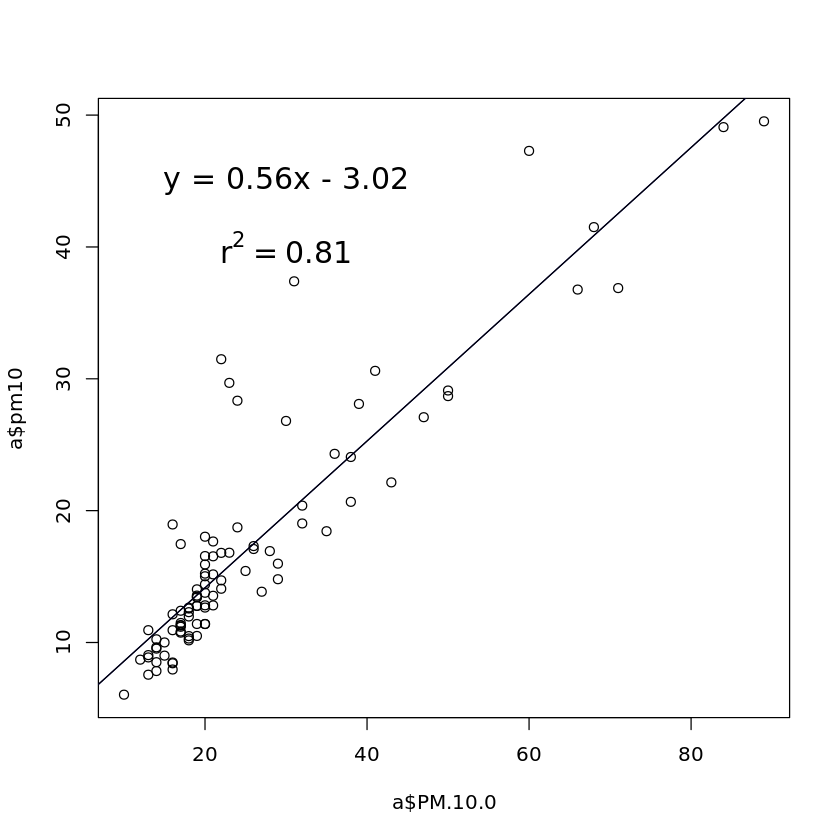

In [ ]:
a = datos %>% filter(pm10 < 150 & PM.10.0 < 150)

plot(a$'PM.10.0', a$pm10)
reg = lm(a$'pm10' ~ a$'PM.10.0')
intercept = round(reg$coefficients[1], digits = 2)
slope = round(reg$coefficients[2], digits = 2)
R2 = round(cor(a$'PM.10.0', a$'pm10')**2, digits = 2)
abline(reg, col = 'navy', lwd = 1)
text(30, 45, paste0('y = ', slope, 'x - ', abs(intercept)), cex = 1.5)
text(30, 40, bquote(r^2 == .(R2)), cex = 1.5)
abline(reg)

In [ ]:
#compare pm retrieved from the sensor with that c,alculated manually, using time series plot
#timePlot(datos, pollutant = c("PM.1.0", "pm1"), group = TRUE, name.pol=c("measured PM1", "calculated PM1"), ylab="PM1 (ug/m3)")
#timePlot(datos, pollutant = c("PM.2.5", "pm2.5"), group = TRUE, name.pol=c("measured P2.5", "calculated PM2.5"), ylab="PM2.5 (ug/m3)")
#timePlot(datos, pollutant = c("PM.10.0", "pm10"), group = TRUE, name.pol=c("measured PM10", "calculated PM10"), ylab="PM10 (ug/m3)")

In [ ]:
length(datos$date)/12

[1] 8

In [ ]:
options(repr.plot.width = 21, repr.plot.height = 7)
xticks = datos$date[c(7,22,36,50,64,79,94)]

pdf('immagini/seriet.pdf', width = 21, height = 7)

par(mfrow = c(1,3), mar=c(5.5,5.5,4,3))

plot(datos$date, datos$`PM.1.0`, type = 'l', col = 'red', xaxt = 'n',
    ylab = TeX(r'(PM_{1} ($ \mu $g m^{-3}))'), xlab = '', cex.axis = 1.5,
    ylim = c(0,400), cex.lab = 2, main = TeX(r'(PM_1)'), cex.main = 3)
grid()
lines(datos$date, datos$pm1, col = 'navy', lty = 2)
axis(side = 1, at = xticks, labels = format(xticks, '%H:%M'), cex.axis = 1.5)
abline(v = xticks[1], lty=4, col = 'grey')
abline(v = xticks[3], lty=4, col = 'grey')
abline(v = xticks[5], lty=4, col = 'grey')
abline(v = xticks[7], lty=4, col = 'grey')

polygon(x = c(xticks[1], xticks[3], xticks[3], xticks[1]), y = c(0, 0, 400, 400), col = rgb(255,0,0, max = 255, alpha = 20), density = 100)
polygon(x = c(xticks[3], xticks[5], xticks[5], xticks[3]), y = c(0, 0, 400, 400), col = rgb(0,0,255, max = 255, alpha = 20), density = 100)
polygon(x = c(xticks[5], xticks[7], xticks[7], xticks[5]), y = c(0, 0, 400, 400), col = rgb(0,255,0, max = 255, alpha = 20), density = 100)

text(xticks[2], 380, 'Periodo 1', col = 'red', cex = 2)
text(xticks[4], 380, 'Periodo 2', col = 'blue', cex = 2)
text(xticks[6], 380, 'Periodo 3', col = 'green', cex = 2)

#par(fig = c(0, 1, 0, 1), oma = c(0, 0, 0, 0), mar = c(0, 0, 0, 0), new = TRUE)
#plot(0, 0, type = 'l', bty = 'n', xaxt = 'n', yaxt = 'n')
#legend('bottom', lty = c(1,2), col = c('red', 'grey'), legend = c(TeX(r'(PM_{1} misurato)'), TeX(r'(PM_{1} calcolato)')),
#        bty = 'n', horiz = T, cex = 1)
#dev.off()

#pdf('immagini/seriet_PM2.5.pdf', width = 7, height = 7)
#par(mar=c(5,5,4,3))

plot(datos$date, datos$`PM.2.5`, type = 'l', col = 'red', xaxt = 'n',
    ylab = TeX(r'(PM_{2.5} ($\mu$g m^{-3}))'), xlab = '', cex.axis = 1.5,
    ylim = c(0,400), cex.lab = 2, main = TeX(r'(PM_{2.5})'), cex.main = 3)
grid()
lines(datos$date, datos$`pm2.5`, col = 'navy', lty = 2)
axis(side = 1, at = xticks, labels = format(xticks, '%H:%M'), cex.axis = 1.5)
abline(v = xticks[1], lty=4, col = 'grey')
abline(v = xticks[3], lty=4, col = 'grey')
abline(v = xticks[5], lty=4, col = 'grey')
abline(v = xticks[7], lty=4, col = 'grey')

polygon(x = c(xticks[1], xticks[3], xticks[3], xticks[1]), y = c(0, 0, 400, 400), col = rgb(255,0,0, max = 255, alpha = 20), density = 100)
polygon(x = c(xticks[3], xticks[5], xticks[5], xticks[3]), y = c(0, 0, 400, 400), col = rgb(0,0,255, max = 255, alpha = 20), density = 100)
polygon(x = c(xticks[5], xticks[7], xticks[7], xticks[5]), y = c(0, 0, 400, 400), col = rgb(0,255,0, max = 255, alpha = 20), density = 100)

text(xticks[2], 380, 'Periodo 1', col = 'red', cex = 2)
text(xticks[4], 380, 'Periodo 2', col = 'blue', cex = 2)
text(xticks[6], 380, 'Periodo 3', col = 'green', cex = 2)


#par(fig = c(0, 1, 0, 1), oma = c(0, 0, 0, 0), mar = c(0, 0, 0, 0), new = TRUE)
#plot(0, 0, type = 'l', bty = 'n', xaxt = 'n', yaxt = 'n')
#legend('bottom', lty = c(1,2), col = c('red', 'darkgrey'), legend = c(TeX(r'(PM_{2.5} misurato)'), TeX(r'(PM_{2.5} calcolato)')),
#        bty = 'n', horiz = T, cex = 1)

#dev.off()

#pdf('immagini/seriet_PM10.pdf', width = 7, height = 7)

#par(mar=c(5,5,4,3))


plot(datos$date, datos$`PM.10.0`, type = 'l', col = 'red', xaxt = 'n',
    ylab = TeX(r'(PM_{10} ($\mu$g m^{-3}))'), xlab = '', cex.axis = 1.5,
    ylim = c(0,400), cex.lab = 2, main = TeX(r'(PM_{10})'), cex.main = 3)
grid()
lines(datos$date, datos$pm10, col = 'navy', lty = 2)
axis(side = 1, at = xticks, labels = format(xticks, '%H:%M'), cex.axis = 1.5)
abline(v = xticks[1], lty=4, col = 'grey')
abline(v = xticks[3], lty=4, col = 'grey')
abline(v = xticks[5], lty=4, col = 'grey')
abline(v = xticks[7], lty=4, col = 'grey')

polygon(x = c(xticks[1], xticks[3], xticks[3], xticks[1]), y = c(0, 0, 400, 400), col = rgb(255,0,0, max = 255, alpha = 20), density = 100)
polygon(x = c(xticks[3], xticks[5], xticks[5], xticks[3]), y = c(0, 0, 400, 400), col = rgb(0,0,255, max = 255, alpha = 20), density = 100)
polygon(x = c(xticks[5], xticks[7], xticks[7], xticks[5]), y = c(0, 0, 400, 400), col = rgb(0,255,0, max = 255, alpha = 20), density = 100)

text(xticks[2], 380, 'Periodo 1', col = 'red', cex = 2)
text(xticks[4], 380, 'Periodo 2', col = 'blue', cex = 2)
text(xticks[6], 380, 'Periodo 3', col = 'green', cex = 2)



par(fig = c(0, 1, 0, 1), oma = c(0, 0, 0, 0), mar = c(0, 0, 0, 0), new = TRUE)
plot(0, 0, type = 'l', bty = 'n', xaxt = 'n', yaxt = 'n')
legend('bottom', lty = c(1,2), col = c('red', 'navy'), legend = c(TeX(r'(PM misurato)'), TeX(r'(PM calcolato)')),
        bty = 'n', horiz = T, cex = 2)

dev.off()


png 
  2

In [ ]:
#calculate indexes for bias and correlation and save as txt file
stat_PM1<-modStats(datos, mod="PM.1.0", obs ="pm1")
stat_PM2.5<-modStats(datos, mod="PM.2.5", obs ="pm2.5")
stat_PM10<-modStats(datos, mod="PM.10.0", obs ="pm10")
stat_PM <- cbind(stat_PM1, stat_PM2.5, stat_PM10)
write.table(stat_PM, file="evaluation_statistics_PM.txt",  dec=".", sep ="\t", col.names=T, row.names=F, append=F)

data_manual <- datos[,19:21]
data_autom <- datos[,10:12]
corr<-cor(data_manual, data_autom, method="spearman")
write.table(corr, file="spearman_correlations_PM.txt",  dec=".", sep ="\t", col.names=T, row.names=T, append=F)

data_1<- -datos[,19:21]+datos[,10:12]
data_2 <- datos[,10:12]
corr<-cor(data_1, data_2, method="spearman")
write.table(corr, file="spearman_correlations_PM_diff.txt",  dec=".", sep ="\t", col.names=T, row.names=T, append=F)

In [ ]:
datos[,19:21]

,pm1,pm2.5,pm10
,<dbl>,<dbl>,<dbl>
2,5.525741,17.144627,37.393173
3,4.638731,12.530805,13.543232
4,2.850950,11.948757,18.023321
5,4.578323,10.497378,10.497378
6,4.543787,12.052218,14.077072
7,4.139185,12.140871,28.339708
8,4.399909,12.127564,15.164846
9,4.268180,11.173744,15.223453
10,3.282403,7.557276,7.557276


In [ ]:
start.date <- as.POSIXct("2021-11-22 14:15", format = "%Y-%m-%d %H:%M", "GMT" )
end.date <- as.POSIXct("2021-11-22 14:45", format = "%Y-%m-%d %H:%M", "GMT")
per_background <- subset(datos, date >= start.date & date <= end.date)

start.date <- as.POSIXct("2021-11-22 14:45", format = "%Y-%m-%d %H:%M", "GMT" )
end.date <- as.POSIXct("2021-11-22 15:15", format = "%Y-%m-%d %H:%M", "GMT")
per_openwind <- subset(datos, date >= start.date & date <= end.date)

start.date <- as.POSIXct("2021-11-22 15:18", format = "%Y-%m-%d %H:%M", "GMT" )
#end.date <- as.POSIXct("2021-11-22 15:41", format = "%Y-%m-%d %H:%M", "GMT") # senza panni
end.date <- as.POSIXct("2021-11-22 15:45", format = "%Y-%m-%d %H:%M", "GMT")
per_incenso <- subset(datos, date >= start.date & date <= end.date)

start.date <- as.POSIXct("2021-11-22 15:41", format = "%Y-%m-%d %H:%M", "GMT" )
end.date <- as.POSIXct("2021-11-22 15:45", format = "%Y-%m-%d %H:%M", "GMT")
per_panni <- subset(datos, date >= start.date & date <= end.date)

# average the data for specified time period, save to new data .txt file, decimal point, tab separated
datos_background <-timeAverage(per_background, avg.time = "30 min", statistic = "mean", vector.ws=FALSE)
datos_openwind <-timeAverage(per_openwind, avg.time = "30 min", statistic = "mean", vector.ws=FALSE)
datos_incenso <-timeAverage(per_incenso, avg.time = "27 min", statistic = "mean", vector.ws=FALSE)
datos_panni <-timeAverage(per_panni, avg.time = "4 min", statistic = "mean", vector.ws=FALSE)

write.table(datos_background, file="media_background.txt",  dec=".", sep ="\t", col.names=T, row.names=F, append=F)
write.table(datos_openwind, file="media_openwind.txt",  dec=".", sep ="\t", col.names=T, row.names=F, append=F)
write.table(datos_incenso, file="media_incenso.txt",  dec=".", sep ="\t", col.names=T, row.names=F, append=F)
#write.table(datos_panni, file="media_panni.txt",  dec=".", sep ="\t", col.names=T, row.names=F, append=F)


In [ ]:
#extract just particle number from the two subsets
PN1 <- datos_background[,13:18]
PN2 <- datos_openwind[,13:18]
PN3 <- datos_incenso[,13:18]
PN4 <- datos_panni[,13:18]
PN = data.frame(d = t(D.opc), P1 = t(PN1), P2 = t(PN2), P3 = t(PN3), type = 'N')

#convert particle number distribution into particle surface distribution, and then plot
S.opc <- pi*D.opc^2
PS1 <- S.opc*PN1
PS2 <- S.opc*PN2
PS3 <- S.opc*PN3
PS4 <- S.opc*PN4
PS = data.frame(d = t(D.opc), P1 = t(PS1), P2 = t(PS2), P3 = t(PS3), type = 'S')


#convert particle number distribution into particle volume distribution, and then plot
V.opc <- pi/6*D.opc^3
PV1 <- V.opc*PN1
PV2 <- V.opc*PN2
PV3 <- V.opc*PN3
PV4 <- V.opc*PN4
PV = data.frame(d = t(D.opc), P1 = t(PV1), P2 = t(PV2), P3 = t(PV3), type = 'V')


In [ ]:
PS1
PS2
PS3

PN.0.3,PN.0.5,PN.1.0,PN.2.5,PN.5.0,PN.10.0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1044.264,1127.047,1176.073,166.6938,39.22208,0


PN.0.3,PN.0.5,PN.1.0,PN.2.5,PN.5.0,PN.10.0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1072.924,1152.809,1342.652,265.7413,27.08191,35.99129


PN.0.3,PN.0.5,PN.1.0,PN.2.5,PN.5.0,PN.10.0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3490.639,3742.811,3600.171,967.1754,772.3361,1045.08


In [ ]:
#plot average particle size distribution for the two periods 
options(repr.plot.width = 18, repr.plot.height = 5)
pdf('immagini/distribuzioni.pdf', width = 18, height = 5)
par(mfrow = c(1,3), mar = c(4,5,2,4), oma = c(4,0,3,0), cex.main = 2)
##############################################################
plot(D.opc, PN1, xlab = expression(paste("D (", mu, "m)")), ylab = expression(paste("dN/dln(D) (cm"^"-3",")")), type ="o", col ="red", yaxt='n',
        log = 'xy', cex.axis = 1.3, cex.lab = 1.5, main = 'Distribuzione in numero')
par(new=T)
plot(D.opc, PN2, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="blue",
        log = 'xy')
par(new=T)
plot(D.opc, PN3, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="green",
        log = 'xy')
par(new=T)
plot(D.opc, PN4, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="orchid",
        log = 'xy')


y1 <- floor(log10(range(PN1[log10(PN1)!=-Inf])))
pow_y <- seq(y1[1], y1[2]+1)
ticksat_y <- as.vector(sapply(pow_y, function(p) (1:10)*10^p))
axis(2, 10^pow_y, at = 10^pow_y)
axis(2, ticksat_y, labels=NA, tcl=-0.25, lwd=0, lwd.ticks=1)

x1 <- floor(log10(range(D.opc)))
pow_x <- seq(x1[1], x1[2]+1)
ticksat_x <- as.vector(sapply(pow_x, function(p) (1:10)*10^p))
axis(1, 10^pow_x)
axis(1, ticksat_x, labels=NA, tcl=-0.25, lwd=0, lwd.ticks=1)


###################################################################

#plot average particle surface distribution for the two periods                 
plot(D.opc, PS1, xlab = expression(paste("D (", mu, "m)")), ylab = expression(paste("dS/dln(D) ( ", mu, "m"^"2","cm"^"-3",")")), 
        type ="o", col ="red", yaxt='n',
        log = 'xy', cex.axis=1.3, cex.lab = 1.5, main = 'Distribuzione in superficie')
par(new=T)
plot(D.opc, PS2, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="blue",
        log = 'xy')
par(new=T)
plot(D.opc, PS3, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="green",
        log = 'xy')
par(new=T)
plot(D.opc, PS4, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="orchid",
        log = 'xy')

y1 <- floor(log10(range(PS1[log10(PS1)!=-Inf])))
pow_y <- seq(y1[1], y1[2]+1)
ticksat_y <- as.vector(sapply(pow_y, function(p) (1:10)*10^p))
axis(2, 10^pow_y, at = 10^pow_y)
axis(2, ticksat_y, labels=NA, tcl=-0.25, lwd=0, lwd.ticks=1)


####################################################
#plot average particle volume distribution for the two periods                 
plot(D.opc, PV1, xlab = expression(paste("D (", mu, "m)")), ylab = expression(paste("dV/dln(D) ( ", mu, "m"^"3","cm"^"-3",")")), 
        type ="o", col ="red", yaxt='n',
        log = 'xy', cex.axis =1.3, cex.lab = 1.5, main = 'Distribuzione in volume')
par(new=T)
plot(D.opc, PV2, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="blue",
        log = 'xy')
par(new=T)
plot(D.opc, PV3, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="green",
        log = 'xy')
par(new=T)
plot(D.opc, PV4, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="orchid",
        log = 'xy')

y1 <- floor(log10(range(PV1[log10(PV1)!=-Inf])))
pow_y <- seq(y1[1], y1[2]+1)
ticksat_y <- as.vector(sapply(pow_y, function(p) (1:10)*10^p))
axis(2, 10^pow_y, at = 10^pow_y, cex.axis=1.3)
axis(2, ticksat_y, labels=NA, tcl=-0.25, lwd=0, lwd.ticks=1)


par(fig = c(0, 1, 0, 1), oma = c(0, 0, 0, 0), mar = c(0, 0, 3, 0), new = TRUE)
plot(0, 0, type = 'l', bty = 'n', xaxt = 'n', yaxt = 'n',
        cex.main = 2)
legend('bottom', lty = 1, col = c('red', 'blue', 'green', 'orchid'), legend = c('Periodo 1', 'Periodo 2', 'Periodo 3', 'Ultimi 5 minuti'),
        bty = 'n', horiz = T, cex = 1.2)
dev.off()

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 y value <= 0 omitted from logarithmic plot”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 y value <= 0 omitted from logarithmic plot”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 y value <= 0 omitted from logarithmic plot”


png 
  2

In [ ]:
floor(log10(range(PN1[log10(PN1)!=-Inf])))

[1] -1  3

In [ ]:
#plot average particle size distribution for the two periods 
options(repr.plot.width = 18, repr.plot.height = 5)
pdf('immagini/distribuzioni.pdf', width = 18, height = 5)
par(mfrow = c(1,3), mar = c(4,5,2,4), oma = c(4,0,3,0), cex.main = 2)

##############################################################
plot(D.opc, PN1, xlab = expression(paste("D (", mu, "m)")), ylab = expression(paste("dN/dln(D) (cm"^"-3",")")), type ="o", col ="red", yaxt='n',
        log = 'xy', cex.lab = 1.5, main = 'Distribuzione in numero',
        ylim = c(0.05,10000))
grid()

lines(D.opc, PN2, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="blue")
lines(D.opc, PN3, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="green")
lines(D.opc, PN4, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="orchid")

y1 <- floor(log10(range(PN1[log10(PN1)!=-Inf])))
pow_y <- seq(y1[1], y1[2]+1)
ticksat_y <- as.vector(sapply(pow_y, function(p) (1:10)*10^p))
axis(2, 10^pow_y, at = 10^pow_y)
axis(2, ticksat_y, labels=NA, tcl=-0.25, lwd=0, lwd.ticks=1)

x1 <- floor(log10(range(D.opc)))
pow_x <- seq(x1[1], x1[2]+1)
ticksat_x <- as.vector(sapply(pow_x, function(p) (1:10)*10^p))
axis(1, 10^pow_x)
axis(1, ticksat_x, labels=NA, tcl=-0.25, lwd=0, lwd.ticks=1)


###################################################################

#plot average particle surface distribution for the two periods                 
plot(D.opc, PS1, xlab = expression(paste("D (", mu, "m)")), ylab = expression(paste("dS/dln(D) ( ", mu, "m"^"2","cm"^"-3",")")), 
        type ="o", col ="red", yaxt='n', ylim = c(10,10000),
        log = 'xy', cex.lab = 1.5, main = 'Distribuzione in superficie')
grid()
lines(D.opc, PS2, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="blue")
lines(D.opc, PS3, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="green")
lines(D.opc, PS4, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="orchid")


y1 <- floor(log10(range(PS1[log10(PS1)!=-Inf])))
pow_y <- seq(y1[1], y1[2]+1)
ticksat_y <- as.vector(sapply(pow_y, function(p) (1:10)*10^p))
axis(2, 10^pow_y, at = 10^pow_y)
axis(2, ticksat_y, labels=NA, tcl=-0.25, lwd=0, lwd.ticks=1)


####################################################
#plot average particle volume distribution for the two periods                 
plot(D.opc, PV1, xlab = expression(paste("D (", mu, "m)")), ylab = expression(paste("dV/dln(D) ( ", mu, "m"^"3","cm"^"-3",")")), 
        type ="o", col ="red", yaxt='n', ylim = c(10,50000),
        log = 'xy', cex.lab = 1.5, main = 'Distribuzione in volume')
grid()
lines(D.opc, PV2, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="blue")
lines(D.opc, PV3, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="green")
lines(D.opc, PV4, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="orchid")


y1 <- floor(log10(range(PV4[log10(PV4)!=-Inf])))
pow_y <- seq(y1[1], y1[2]+1)
ticksat_y <- as.vector(sapply(pow_y, function(p) (1:10)*10^p))
axis(2, 10^pow_y, at = 10^pow_y)
axis(2, ticksat_y, labels=NA, tcl=-0.25, lwd=0, lwd.ticks=1)


par(fig = c(0, 1, 0, 1), oma = c(0, 0, 0, 0), mar = c(0, 0, 3, 0), new = TRUE)
plot(0, 0, type = 'l', bty = 'n', xaxt = 'n', yaxt = 'n',
        cex.main = 2)
legend('bottom', lty = 1, col = c('red', 'blue', 'green', 'orchid'), legend = c('Periodo 1', 'Periodo 2', 'Periodo 3', 'Ultimi 5 minuti'),
        bty = 'n', horiz = T, cex = 1.5)
dev.off()

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 y value <= 0 omitted from logarithmic plot”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 y value <= 0 omitted from logarithmic plot”
Warning message in xy.coords(x, y, xlabel, ylabel, log):
“1 y value <= 0 omitted from logarithmic plot”


png 
  2

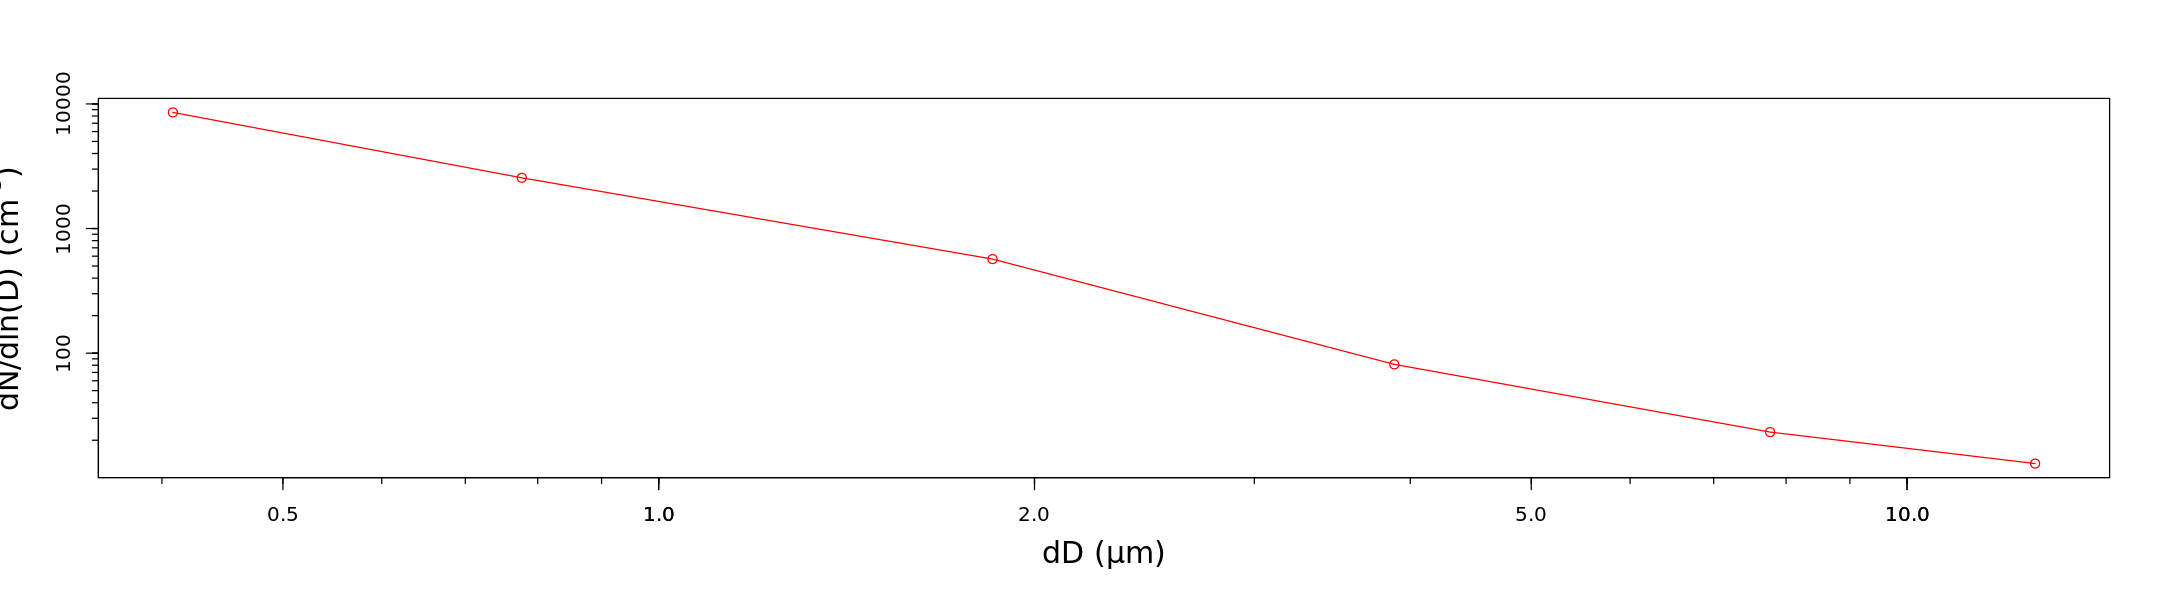

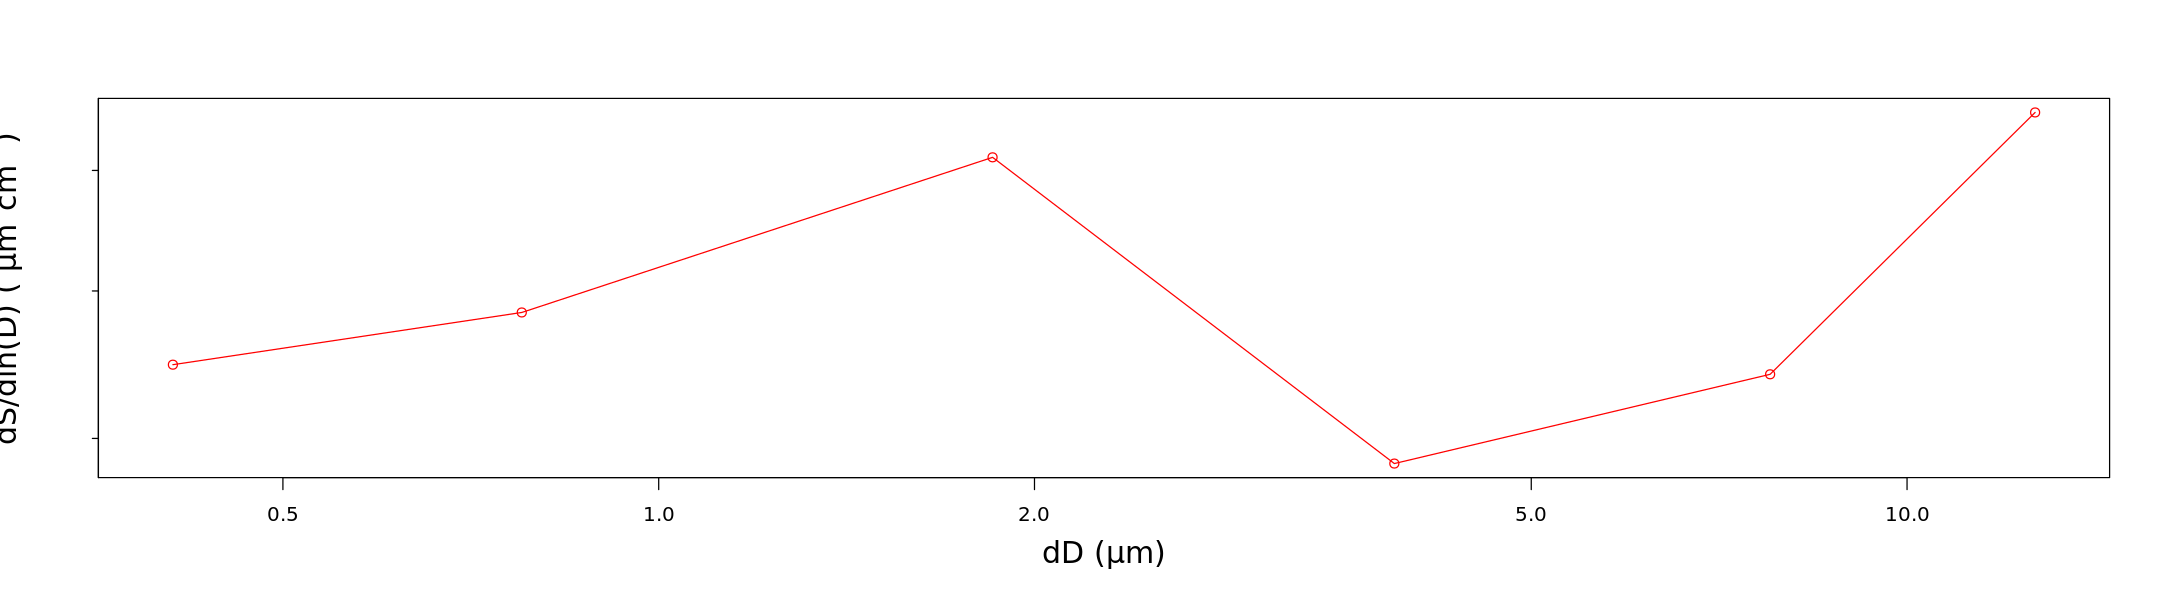

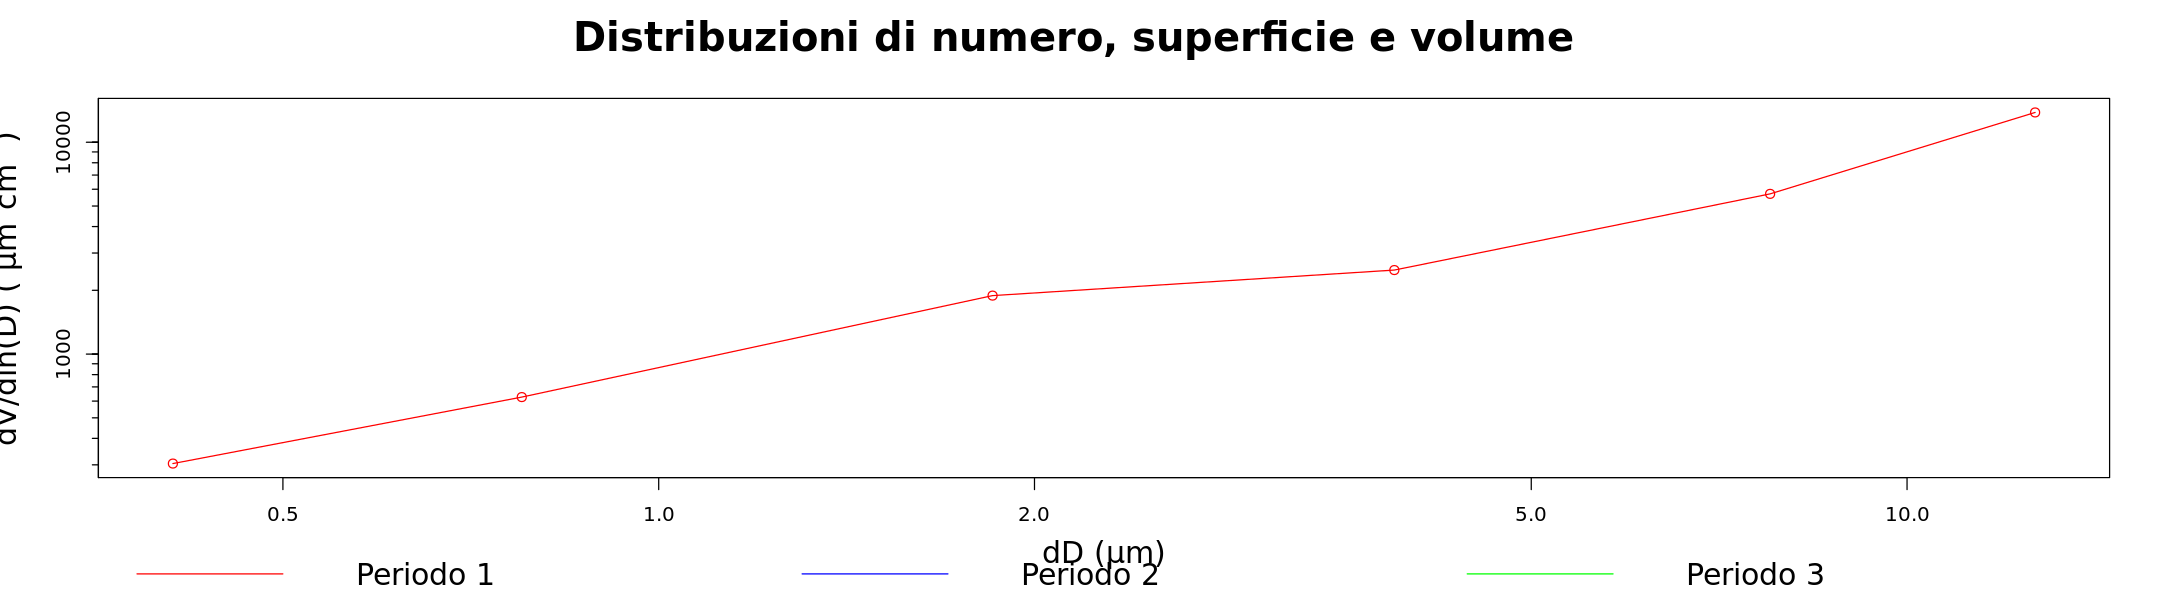

In [ ]:
##############################################################
plot(D.opc, PN4, xlab = expression(paste("dD (", mu, "m)")), ylab = expression(paste("dN/dln(D) (cm"^"-3",")")), type ="o", col ="red", yaxt='n',
        log = 'xy', cex.lab = 1.5)

y1 <- floor(log10(range(PN4[log10(PN4)!=-Inf])))
pow_y <- seq(y1[1], y1[2]+1)
ticksat_y <- as.vector(sapply(pow_y, function(p) (1:10)*10^p))
axis(2, 10^pow_y, at = 10^pow_y)
axis(2, ticksat_y, labels=NA, tcl=-0.25, lwd=0, lwd.ticks=1)

x1 <- floor(log10(range(D.opc)))
pow_x <- seq(x1[1], x1[2]+1)
ticksat_x <- as.vector(sapply(pow_x, function(p) (1:10)*10^p))
axis(1, 10^pow_x)
axis(1, ticksat_x, labels=NA, tcl=-0.25, lwd=0, lwd.ticks=1)


###################################################################

#plot average particle surface distribution for the two periods                 
plot(D.opc, PS4, xlab = expression(paste("dD (", mu, "m)")), ylab = expression(paste("dS/dln(D) ( ", mu, "m"^"2","cm"^"-3",")")), 
        type ="o", col ="red", yaxt='n',
        log = 'xy', cex.lab = 1.5)

y1 <- floor(log10(range(PS4[log10(PS4)!=-Inf])))
pow_y <- seq(y1[1], y1[2]+1)
ticksat_y <- as.vector(sapply(pow_y, function(p) (1:10)*10^p))
axis(2, 10^pow_y, at = 10^pow_y)
axis(2, ticksat_y, labels=NA, tcl=-0.25, lwd=0, lwd.ticks=1)


####################################################
#plot average particle volume distribution for the two periods                 
plot(D.opc, PV4, xlab = expression(paste("dD (", mu, "m)")), ylab = expression(paste("dV/dln(D) ( ", mu, "m"^"3","cm"^"-3",")")), 
        type ="o", col ="red", yaxt='n',
        log = 'xy', cex.lab = 1.5)

y1 <- floor(log10(range(PV4[log10(PV4)!=-Inf])))
pow_y <- seq(y1[1], y1[2]+1)
ticksat_y <- as.vector(sapply(pow_y, function(p) (1:10)*10^p))
axis(2, 10^pow_y, at = 10^pow_y)
axis(2, ticksat_y, labels=NA, tcl=-0.25, lwd=0, lwd.ticks=1)


par(fig = c(0, 1, 0, 1), oma = c(0, 0, 0, 0), mar = c(0, 0, 3, 0), new = TRUE)
plot(0, 0, type = 'l', bty = 'n', xaxt = 'n', yaxt = 'n', main = 'Distribuzioni di numero, superficie e volume ',
        cex.main = 2)
legend('bottom', lty = 1, col = c('red', 'blue', 'green'), legend = c('Periodo 1', 'Periodo 2', 'Periodo 3'),
        bty = 'n', horiz = T, cex = 1.5)
#dev.off()

In [ ]:
floor(log10(range(PS1[log10(PS1)!=-Inf])))

[1] 1 3

## Momenti

In [ ]:
#Momento zero = N totale di particelle

N1 = sum(PN1)
N2 = sum(PN2)
N3 = sum(PN3)
N4 = sum(PN4)

N1
N2
N3

[1] 2702.69

[1] 2788.607

[1] 9004.63

In [ ]:
#Momento 1 : diametro medio D0
D1 = sum(D.opc*PN1)/N1
D2 = sum(D.opc*PN2)/N2
D3 = sum(D.opc*PN3)/N3
D4 = sum(D.opc*PN4)/N4

D1
D2
D3
D4

[1] 0.5526695

[1] 0.5607705

[1] 0.5566133

[1] 0.6096602

In [ ]:
# Momento 2: superficie media A0
A1 = sum(D.opc**2*PN1)/N1*pi
A2 = sum(D.opc**2*PN2)/N2*pi
A3 = sum(D.opc**2*PN3)/N3*pi
A4 = sum(D.opc**2*PN4)/N4*pi

A1
A2
A3

[1] 1.314727

[1] 1.397543

[1] 1.512357

In [ ]:
#Momento 3 : volume medio V0

V1 = sum(D.opc**3*PN1)/N1*pi/6
V2 = sum(D.opc**3*PN2)/N2*pi/6
V3 = sum(D.opc**3*PN3)/N3*pi/6
V4 = sum(D.opc**3*PN4)/N4*pi/6


V1
V2
V3

[1] 0.2732452

[1] 0.3297506

[1] 0.6290894

In [ ]:
D.opc

0.4081655,0.7768081,1.85118,3.884041,7.768081,12.66449


In [ ]:
PN1

PN.0.3,PN.0.5,PN.1.0,PN.2.5,PN.5.0,PN.10.0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1995.207,594.5172,109.2414,3.517241,0.2068966,0


In [ ]:
#momenti
diams = c(0.30, 0.50, 1.0, 2.5, 5.0, 10.0, 15.0)
dD.opc = diff(diams)/2
dPN1 = 1/sqrt(PN1)
dPN1[6] = 1
dPN2 = 1/sqrt(PN2)
dPN3 = 1/sqrt(PN3)
dPN4 = 1/sqrt(PN4)


N1 = sum(PN1)
dN1 = sum(dPN1)
N2 = sum(PN2)
dN2 = sum(dPN2)
N3 = sum(PN3)
dN3 = sum(dPN3)
N4 = sum(PN4)
dN4 = sum(dPN4)

D1 = sum(D.opc*PN1)/N1
dD1 = sum(PN1*dD.opc)/N1 + sum(D.opc*dPN1)/N1 + D1/N1**2*dN1
D2 = sum(D.opc*PN2)/N2 
dD2 = sum(PN2*dD.opc)/N2 + sum(D.opc*dPN2)/N2 + D2/N2**2*dN2
D3 = sum(D.opc*PN3)/N3
dD3 = sum(PN3*dD.opc)/N3 + sum(D.opc*dPN3)/N3 + D3/N3**2*dN3
D4 = sum(D.opc*PN4)/N4
dD4 = sum(PN4*dD.opc)/N4 + sum(D.opc*dPN4)/N4 + D4/N4**2*dN4


A1 = sum(D.opc**2*PN1)/N1*pi
dA1 = (sum(2*D.opc*PN1*dD.opc)/N1 + sum(D.opc**2*dPN1)/N1 + A1/(pi*N1)*dN1)*pi
A2 = sum(D.opc**2*PN2)/N2*pi
dA2 = (sum(2*D.opc*PN2*dD.opc)/N2 + sum(D.opc**2*dPN2)/N2 + A2/(pi*N2)*dN2)*pi
A3 = sum(D.opc**2*PN3)/N3*pi
dA3 = (sum(2*D.opc*PN3*dD.opc)/N3 + sum(D.opc**2*dPN3)/N3 + A3/(pi*N3)*dN3)*pi
A4 = sum(D.opc**2*PN4)/N4*pi
dA4 = (sum(2*D.opc*PN4*dD.opc)/N4 + sum(D.opc**2*dPN4)/N4 + A4/(pi*N4)*dN4)*pi


V1 = sum(D.opc**3*PN1)/N1*pi/6
dV1 = (sum(3*D.opc**2*PN1*dD.opc)/N1 + sum(D.opc**3*dPN1)/N1 + 6*V1/(pi*N1)*dN1)*pi/6
V2 = sum(D.opc**3*PN2)/N2*pi/6
dV2 = (sum(3*D.opc**2*PN2*dD.opc)/N2 + sum(D.opc**3*dPN2)/N2 + 6*V2/(pi*N2)*dN2)*pi/6
V3 = sum(D.opc**3*PN3)/N3*pi/6
dV3 = (sum(3*D.opc**2*PN3*dD.opc)/N3 + sum(D.opc**3*dPN3)/N3 + 6*V3/(pi*N3)*dN3)*pi/6
V4 = sum(D.opc**3*PN4)/N4*pi/6
dV4 = (sum(3*D.opc**2*PN4*dD.opc)/N4 + sum(D.opc**3*dPN4)/N4 + 6*V4/(pi*N4)*dN4)*pi/6



In [ ]:
V1

[1] 0.2732452

In [ ]:
options(repr.plot.width = 14, repr.plot.height = 10)
pdf('immagini/momenti.pdf', width = 14, height = 10)
a = c(N1,N2,N3,N4)
da = c(dN1, dN2, dN3, dN4)
par(mfrow=c(2,2), cex.axis = 1.3, cex.lab = 2.2, mar = c(3,6,3,4), cex.main = 2)
barplot(c(N1,N2,N3,N4), names.arg = c('Periodo 1', 'Periodo 2', 'Periodo 3', 'Ultimi 5 min'), col = c('red', 'blue', 'green', "orchid"), density = 30,
        ylab = expression(paste('# particelle / cm'^'3')), ylim = c(0,13000))
#arrows(x0=c(0.7, 1.9, 3.1, 4.3, 5.5), y0=a+da, x1=c(0.7, 1.9, 3.1, 4.3, 5.5), y1=a-da, code=3, angle=90, length=0.1, col=c('red', 'blue', 'green', 'orchid'), lwd=2)


a = c(D1,D2,D3,D4)
da = c(dD1, dD2, dD3, dD4)
barplot(c(D1,D2,D3,D4), names.arg = c('Periodo 1', 'Periodo 2', 'Periodo 3', 'Ultimi 5 min'), col = c('red', 'blue', 'green', 'orchid'), density = 30, ylim = c(0,0.7),
        ylab = expression(paste('Diametro medio (', mu, 'm)')))
#arrows(x0=c(0.7, 1.9, 3.1, 4.3, 5.5), y0=a+da, x1=c(0.7, 1.9, 3.1, 4.3, 5.5), y1=a-da, code=3, angle=90, length=0.1, col=c('red', 'blue', 'green', 'orchid'), lwd=2)

a = c(A1,A2,A3,A4)
da = c(dA1, dA2, dA3, dA4)
barplot(c(A1,A2,A3,A4), names.arg = c('Periodo 1', 'Periodo 2', 'Periodo 3', 'Ultimi 5 min'), col = c('red', 'blue', 'green', 'orchid'), density = 30, ylim = c(0,3),
        ylab = expression(paste('Superficie media (', mu, 'm'^'2',')')))
#arrows(x0=c(0.7, 1.9, 3.1, 4.3, 5.5), y0=a+da, x1=c(0.7, 1.9, 3.1, 4.3, 5.5), y1=a-da, code=3, angle=90, length=0.1, col=c('red', 'blue', 'green', 'orchid'), lwd=2)


a = c(V1,V2,V3,V4)
da = c(dV1, dV2, dV3, dV4)
barplot(c(V1,V2,V3,V4), names.arg = c('Periodo 1', 'Periodo 2', 'Periodo 3', 'Ultimi 5 min'), col = c('red', 'blue', 'green', 'orchid'), density = 30, ylim = c(0,2.5),
        ylab = expression(paste('Volume medio (', mu, 'm'^'3',')')))
#arrows(x0=c(0.7, 1.9, 3.1, 4.3, 5.5), y0=a+da, x1=c(0.7, 1.9, 3.1, 4.3, 5.5), y1=a-da, code=3, angle=90, length=0.1, col=c('red', 'blue', 'green', 'orchid'), lwd=2)

dev.off()

png 
  2

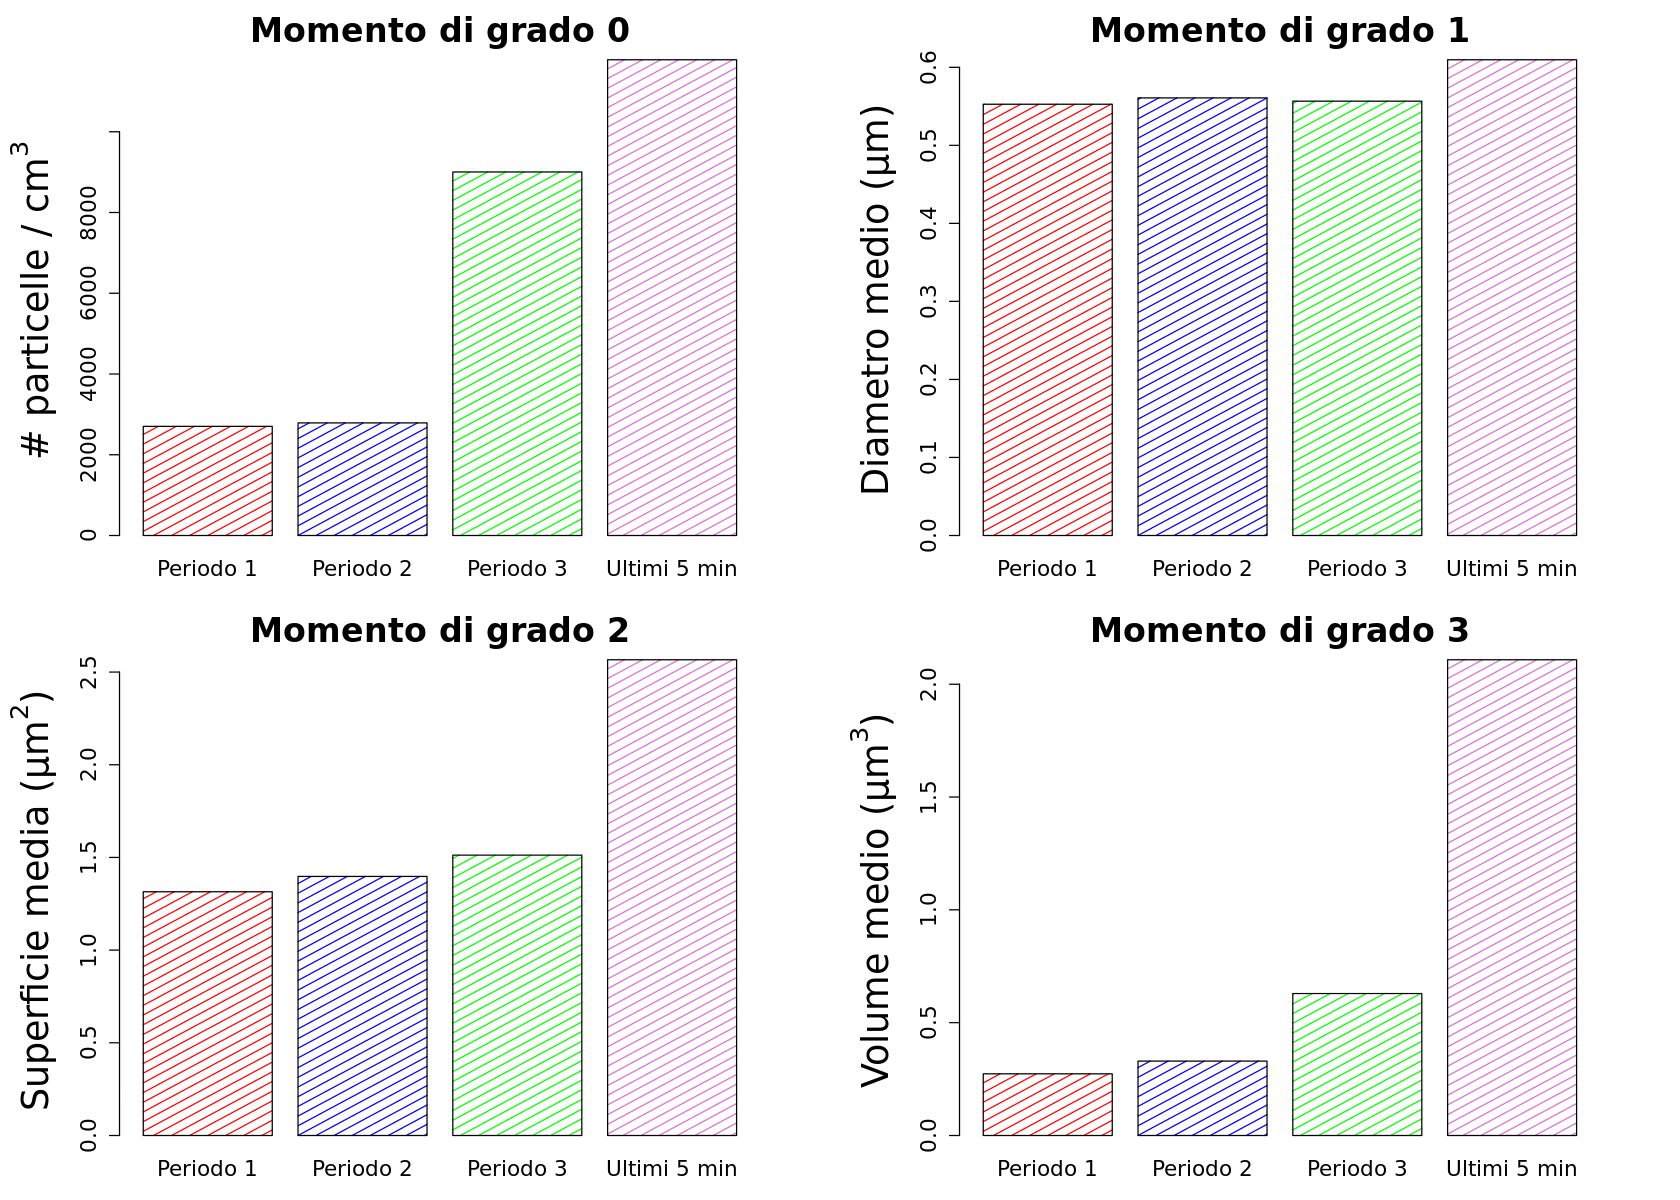

In [ ]:
options(repr.plot.width = 14, repr.plot.height = 10)
#pdf('immagini/momenti.pdf', width = 14, height = 10)
par(mfrow=c(2,2), cex.axis = 1.3, cex.lab = 2.2, mar = c(3,6,3,4), cex.main = 2)
barplot(c(N1,N2,N3,N4), names.arg = c('Periodo 1', 'Periodo 2', 'Periodo 3', 'Ultimi 5 min'), col = c('red', 'blue', 'green', "orchid"), density = 30,
        ylab = expression(paste('# particelle / cm'^'3')), main = 'Momento di grado 0')
barplot(c(D1,D2,D3,D4), names.arg = c('Periodo 1', 'Periodo 2', 'Periodo 3', 'Ultimi 5 min'), col = c('red', 'blue', 'green', 'orchid'), density = 30,
        ylab = expression(paste('Diametro medio (', mu, 'm)')), main = 'Momento di grado 1')
barplot(c(A1,A2,A3,A4), names.arg = c('Periodo 1', 'Periodo 2', 'Periodo 3', 'Ultimi 5 min'), col = c('red', 'blue', 'green', 'orchid'), density = 30,
        ylab = expression(paste('Superficie media (', mu, 'm'^'2',')')), main = 'Momento di grado 2')
barplot(c(V1,V2,V3,V4), names.arg = c('Periodo 1', 'Periodo 2', 'Periodo 3', 'Ultimi 5 min'), col = c('red', 'blue', 'green', 'orchid'), density = 30,
        ylab = expression(paste('Volume medio (', mu, 'm'^'3',')')), , main = 'Momento di grado 3')
#dev.off()

## Analisi ultimi 5 minuti

## Confronto con OPC buono

In [ ]:
#Confronto con opc vero

file_in <- "Dati_buoni.txt"

#read data table, skip first 2 lines after the header
datos_g <- read.table(file=file_in, sep="\t", na.string="null", as.is=TRUE, header=FALSE, skip=1,
                    col.names = c("Date", "Hour", "Iden", "> 0.30 µm","> 0.40 µm", 
                    "> 0.50 µm", "> 0.65 µm", "> 0.80 µm", "> 1.00 µm", "> 1.60 µm",
                    "> 2.00 µm", "> 3.00 µm", "> 4.00 µm", "> 5.00 µm", "> 7.50 µm",
                    "> 10.0 µm", "> 15.0 µm", "> 20.0 µm", "0.30","0.40","0.50","0.65",
                    "0.8", "1", "1.6", "2", "3", "4","5", "7.5", "10", "15", "20"))

datos_g$date <- paste(datos_g$Date, datos_g$Hour, sep= ' ')
datos_g <- datos_g[,]
datos_g <- datos_g[-(1:18),-(1:2)]
datos_g <- datos_g[-(99:109),]
datos_g <- dplyr::filter(datos_g, substr(datos_g$date, 12,16) != "14:33")
datos_g <- dplyr::filter(datos_g, substr(datos_g$date, 12,16) != "14:50")

### PROVA FILTRAGGIO DATO STRANO ##
#datos_g = datos_g %>% filter(X10< 300)

bin.opc_g <-matrix(c(0.30, 0.40, 0.50, 0.65, 0.80, 1.0, 1.60, 2, 3, 4, 5.0, 7.5, 10.0, 15.0, 20),1,15)
D.opc_g <-matrix(NA,1,14)

m.opc_g <-matrix(NA,nrow(datos_g),14)
colnames(m.opc_g)<-c(paste0("bin",seq(1:14),"_opc"))
opc_g.s<-datos_g[,17:31]*10^-3  #counts/cm-3, conversione fatta male da excel


In [ ]:
datos_g

Iden,X..0.30.µm,X..0.40.µm,X..0.50.µm,X..0.65.µm,X..0.80.µm,X..1.00.µm,X..1.60.µm,X..2.00.µm,X..3.00.µm,⋯,X1.6,X2,X3,X4,X5,X7.5,X10,X15,X20,date
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
GR01,58460,25073,10450,2650,985,590,330,172,78,⋯,158,94,26,18,11,5,17,1,0,22/11/2021 14:10:00
GR01,52962,21938,8749,2195,810,490,190,106,53,⋯,84,53,17,16,10,4,6,0,0,22/11/2021 14:11:00
GR01,51613,21481,8469,2235,865,490,200,117,68,⋯,83,49,19,20,14,6,6,2,1,22/11/2021 14:12:00
GR01,52122,21727,8844,2250,790,490,205,106,55,⋯,99,51,19,6,14,7,7,2,0,22/11/2021 14:13:00
GR01,51844,21572,8799,2295,715,400,145,86,44,⋯,59,42,20,9,7,3,5,0,0,22/11/2021 14:14:00
GR01,54135,22631,9419,2470,900,500,215,133,80,⋯,82,53,23,21,14,12,10,0,0,22/11/2021 14:15:00
GR01,49081,20432,8198,2015,685,395,180,97,59,⋯,83,38,21,11,15,5,5,1,1,22/11/2021 14:16:00
GR01,51138,21592,8899,2295,810,440,205,106,48,⋯,99,58,17,5,9,9,5,3,0,22/11/2021 14:17:00
GR01,48698,19975,7898,2045,740,390,180,117,51,⋯,63,66,15,11,10,8,6,0,1,22/11/2021 14:18:00


In [ ]:
for(i in 1:14){
  LB<-bin.opc_g[,i]
  UB<-bin.opc_g[,i+1]
  D.opc_g[,i]<-LB*(1/4*(1+(UB/LB)^2)*(1+(UB/LB)))^(1/3)
  m.opc_g[,i]<-1.65*opc_g.s[,i]*(D.opc_g[,i]*10^-4)^3*pi/6
}
C.opc_g<-m.opc_g*10^12


In [ ]:
dim(C.opc_g)


[1] 96 14

In [ ]:
pm1 <- cbind(apply(C.opc_g[,1:5],1,sum,na.rm=FALSE))   # calcolo del pm1
pm2.5 <- cbind(apply(C.opc_g[,1:8],1,sum,na.rm=FALSE))   # calcolo del pm2.5
pm10 <- cbind(apply(C.opc_g[,1:12],1,sum,na.rm=FALSE))   # calcolo del pm10

datos_g <- cbind(datos_g, pm1, pm2.5, pm10) 


In [ ]:
options(repr.plot.width = 21, repr.plot.height = 7)
xticks = datos$date[c(7,22,36,50,64,79,94)]

pdf('immagini/seriet_OPC.pdf', width = 21, height = 7)

par(mfrow = c(1,3), mar=c(5.5,5.5,4,3))
plot(datos$date, datos_g$pm1, type = 'l', col = 'red', xaxt = 'n',
    ylab = TeX(r'(PM_{1} ($ \mu $g m^{-3}))'), xlab = '', cex.axis = 1.5,

    ylim = c(0,400), cex.lab = 2, main = TeX(r'(PM_1)'), cex.main = 3)
grid()
lines(datos$date, datos$pm1, col = 'navy', lty = 2)
axis(side = 1, at = xticks, labels = format(xticks, '%H:%M'), cex.axis = 1.5)
abline(v = xticks[1], lty=4, col = 'grey')
abline(v = xticks[3], lty=4, col = 'grey')
abline(v = xticks[5], lty=4, col = 'grey')
abline(v = xticks[7], lty=4, col = 'grey')

polygon(x = c(xticks[1], xticks[3], xticks[3], xticks[1]), y = c(0, 0, 400, 400), col = rgb(255,0,0, max = 255, alpha = 20), density = 100)
polygon(x = c(xticks[3], xticks[5], xticks[5], xticks[3]), y = c(0, 0, 400, 400), col = rgb(0,0,255, max = 255, alpha = 20), density = 100)
polygon(x = c(xticks[5], xticks[7], xticks[7], xticks[5]), y = c(0, 0, 400, 400), col = rgb(0,255,0, max = 255, alpha = 20), density = 100)

text(xticks[2], 380, 'Periodo 1', col = 'red', cex = 2)
text(xticks[4], 380, 'Periodo 2', col = 'blue', cex = 2)
text(xticks[6], 380, 'Periodo 3', col = 'green', cex = 2)

#par(fig = c(0, 1, 0, 1), oma = c(0, 0, 0, 0), mar = c(0, 0, 0, 0), new = TRUE)
#plot(0, 0, type = 'l', bty = 'n', xaxt = 'n', yaxt = 'n')
#legend('bottom', lty = c(1,2), col = c('red', 'grey'), legend = c(TeX(r'(PM_{1} misurato)'), TeX(r'(PM_{1} calcolato)')),
#        bty = 'n', horiz = T, cex = 1)
#dev.off()

#pdf('immagini/seriet_PM2.5.pdf', width = 7, height = 7)
#par(mar=c(5,5,4,3))

plot(datos$date, datos_g$pm2.5, type = 'l', col = 'red', xaxt = 'n',
    ylab = TeX(r'(PM_{2.5} ($\mu$g m^{-3}))'), xlab = '', cex.axis = 1.5,
    ylim = c(0,400), cex.lab = 2, main = TeX(r'(PM_{2.5})'), cex.main = 3)
grid()
lines(datos$date, datos$`pm2.5`, col = 'navy', lty = 2)
axis(side = 1, at = xticks, labels = format(xticks, '%H:%M'), cex.axis = 1.5)
abline(v = xticks[1], lty=4, col = 'grey')
abline(v = xticks[3], lty=4, col = 'grey')
abline(v = xticks[5], lty=4, col = 'grey')
abline(v = xticks[7], lty=4, col = 'grey')

polygon(x = c(xticks[1], xticks[3], xticks[3], xticks[1]), y = c(0, 0, 400, 400), col = rgb(255,0,0, max = 255, alpha = 20), density = 100)
polygon(x = c(xticks[3], xticks[5], xticks[5], xticks[3]), y = c(0, 0, 400, 400), col = rgb(0,0,255, max = 255, alpha = 20), density = 100)
polygon(x = c(xticks[5], xticks[7], xticks[7], xticks[5]), y = c(0, 0, 400, 400), col = rgb(0,255,0, max = 255, alpha = 20), density = 100)

text(xticks[2], 380, 'Periodo 1', col = 'red', cex = 2)
text(xticks[4], 380, 'Periodo 2', col = 'blue', cex = 2)
text(xticks[6], 380, 'Periodo 3', col = 'green', cex = 2)


#par(fig = c(0, 1, 0, 1), oma = c(0, 0, 0, 0), mar = c(0, 0, 0, 0), new = TRUE)
#plot(0, 0, type = 'l', bty = 'n', xaxt = 'n', yaxt = 'n')
#legend('bottom', lty = c(1,2), col = c('red', 'darkgrey'), legend = c(TeX(r'(PM_{2.5} misurato)'), TeX(r'(PM_{2.5} calcolato)')),
#        bty = 'n', horiz = T, cex = 1)

#dev.off()

#pdf('immagini/seriet_PM10.pdf', width = 7, height = 7)

#par(mar=c(5,5,4,3))


plot(datos$date, datos_g$pm10, type = 'l', col = 'red', xaxt = 'n',
    ylab = TeX(r'(PM_{10} ($\mu$g m^{-3}))'), xlab = '', cex.axis = 1.5,
    ylim = c(0,400), cex.lab = 2, main = TeX(r'(PM_{10})'), cex.main = 3)
grid()
lines(datos$date, datos$pm10, col = 'navy', lty = 2)
axis(side = 1, at = xticks, labels = format(xticks, '%H:%M'), cex.axis = 1.5)
abline(v = xticks[1], lty=4, col = 'grey')
abline(v = xticks[3], lty=4, col = 'grey')
abline(v = xticks[5], lty=4, col = 'grey')
abline(v = xticks[7], lty=4, col = 'grey')

polygon(x = c(xticks[1], xticks[3], xticks[3], xticks[1]), y = c(0, 0, 400, 400), col = rgb(255,0,0, max = 255, alpha = 20), density = 100)
polygon(x = c(xticks[3], xticks[5], xticks[5], xticks[3]), y = c(0, 0, 400, 400), col = rgb(0,0,255, max = 255, alpha = 20), density = 100)
polygon(x = c(xticks[5], xticks[7], xticks[7], xticks[5]), y = c(0, 0, 400, 400), col = rgb(0,255,0, max = 255, alpha = 20), density = 100)

text(xticks[2], 380, 'Periodo 1', col = 'red', cex = 2)
text(xticks[4], 380, 'Periodo 2', col = 'blue', cex = 2)
text(xticks[6], 380, 'Periodo 3', col = 'green', cex = 2)



par(fig = c(0, 1, 0, 1), oma = c(0, 0, 0, 0), mar = c(0, 0, 0, 0), new = TRUE)
plot(0, 0, type = 'l', bty = 'n', xaxt = 'n', yaxt = 'n')
legend('bottom', lty = c(1,2), col = c('red', 'navy'), legend = c(TeX(r'(PM GRIMM)'), TeX(r'(PM Smart Citizen)')),
        bty = 'n', horiz = T, cex = 2)

dev.off()


png 
  2

In [ ]:
#serie temporale su un periodo più piccolo

options(repr.plot.width = 21, repr.plot.height = 7)
xticks = datos$date[c(7,22,36,50,64,79,94)]

pdf('immagini/seriet_OPC_prova.pdf', width = 21, height = 7)

par(mfrow = c(1,3), mar=c(5.5,5.5,4,3))
plot(datos$date, datos_g$pm1, type = 'l', col = 'red', xaxt = 'n',
    ylab = TeX(r'(PM_{1} ($ \mu $g m^{-3}))'), xlab = '', cex.axis = 1.5,

    ylim = c(0,25), cex.lab = 2, main = TeX(r'(PM_1)'), cex.main = 3,
    xlim = c(xticks[1], xticks[5]))
grid()
lines(datos$date, datos$pm1, col = 'navy', lty = 2)
axis(side = 1, at = xticks, labels = format(xticks, '%H:%M'), cex.axis = 1.5)
abline(v = xticks[1], lty=4, col = 'grey')
abline(v = xticks[3], lty=4, col = 'grey')
abline(v = xticks[5], lty=4, col = 'grey')
abline(v = xticks[7], lty=4, col = 'grey')

polygon(x = c(xticks[1], xticks[3], xticks[3], xticks[1]), y = c(0, 0, 400, 400), col = rgb(255,0,0, max = 255, alpha = 20), density = 100)
polygon(x = c(xticks[3], xticks[5], xticks[5], xticks[3]), y = c(0, 0, 400, 400), col = rgb(0,0,255, max = 255, alpha = 20), density = 100)
polygon(x = c(xticks[5], xticks[7], xticks[7], xticks[5]), y = c(0, 0, 400, 400), col = rgb(0,255,0, max = 255, alpha = 20), density = 100)

text(xticks[2], 25, 'Periodo 1', col = 'red', cex = 2)
text(xticks[4], 25, 'Periodo 2', col = 'blue', cex = 2)
text(xticks[6], 25, 'Periodo 3', col = 'green', cex = 2)


plot(datos$date, datos_g$pm2.5, type = 'l', col = 'red', xaxt = 'n',
    ylab = TeX(r'(PM_{2.5} ($\mu$g m^{-3}))'), xlab = '', cex.axis = 1.5,
    ylim = c(0,25), cex.lab = 2, main = TeX(r'(PM_{2.5})'), cex.main = 3,
    xlim = c(xticks[1], xticks[5]))
grid()
lines(datos$date, datos$`pm2.5`, col = 'navy', lty = 2)
axis(side = 1, at = xticks, labels = format(xticks, '%H:%M'), cex.axis = 1.5)
abline(v = xticks[1], lty=4, col = 'grey')
abline(v = xticks[3], lty=4, col = 'grey')
abline(v = xticks[5], lty=4, col = 'grey')
abline(v = xticks[7], lty=4, col = 'grey')

polygon(x = c(xticks[1], xticks[3], xticks[3], xticks[1]), y = c(0, 0, 400, 400), col = rgb(255,0,0, max = 255, alpha = 20), density = 100)
polygon(x = c(xticks[3], xticks[5], xticks[5], xticks[3]), y = c(0, 0, 400, 400), col = rgb(0,0,255, max = 255, alpha = 20), density = 100)
polygon(x = c(xticks[5], xticks[7], xticks[7], xticks[5]), y = c(0, 0, 400, 400), col = rgb(0,255,0, max = 255, alpha = 20), density = 100)

text(xticks[2], 25, 'Periodo 1', col = 'red', cex = 2)
text(xticks[4], 25, 'Periodo 2', col = 'blue', cex = 2)
text(xticks[6], 25, 'Periodo 3', col = 'green', cex = 2)



plot(datos$date, datos_g$pm10, type = 'l', col = 'red', xaxt = 'n',
    ylab = TeX(r'(PM_{10} ($\mu$g m^{-3}))'), xlab = '', cex.axis = 1.5,
    ylim = c(0,25), cex.lab = 2, main = TeX(r'(PM_{10})'), cex.main = 3,
    xlim = c(xticks[1], xticks[5]))
grid()
lines(datos$date, datos$pm10, col = 'navy', lty = 2)
axis(side = 1, at = xticks, labels = format(xticks, '%H:%M'), cex.axis = 1.5)
abline(v = xticks[1], lty=4, col = 'grey')
abline(v = xticks[3], lty=4, col = 'grey')
abline(v = xticks[5], lty=4, col = 'grey')
abline(v = xticks[7], lty=4, col = 'grey')

polygon(x = c(xticks[1], xticks[3], xticks[3], xticks[1]), y = c(0, 0, 400, 400), col = rgb(255,0,0, max = 255, alpha = 20), density = 100)
polygon(x = c(xticks[3], xticks[5], xticks[5], xticks[3]), y = c(0, 0, 400, 400), col = rgb(0,0,255, max = 255, alpha = 20), density = 100)
polygon(x = c(xticks[5], xticks[7], xticks[7], xticks[5]), y = c(0, 0, 400, 400), col = rgb(0,255,0, max = 255, alpha = 20), density = 100)

text(xticks[2], 25, 'Periodo 1', col = 'red', cex = 2)
text(xticks[4], 25, 'Periodo 2', col = 'blue', cex = 2)
text(xticks[6], 25, 'Periodo 3', col = 'green', cex = 2)



par(fig = c(0, 1, 0, 1), oma = c(0, 0, 0, 0), mar = c(0, 0, 0, 0), new = TRUE)
plot(0, 0, type = 'l', bty = 'n', xaxt = 'n', yaxt = 'n')
legend('bottom', lty = c(1,2), col = c('red', 'navy'), legend = c(TeX(r'(PM GRIMM)'), TeX(r'(PM Smart Citizen)')),
        bty = 'n', horiz = T, cex = 2)

dev.off()


png 
  2

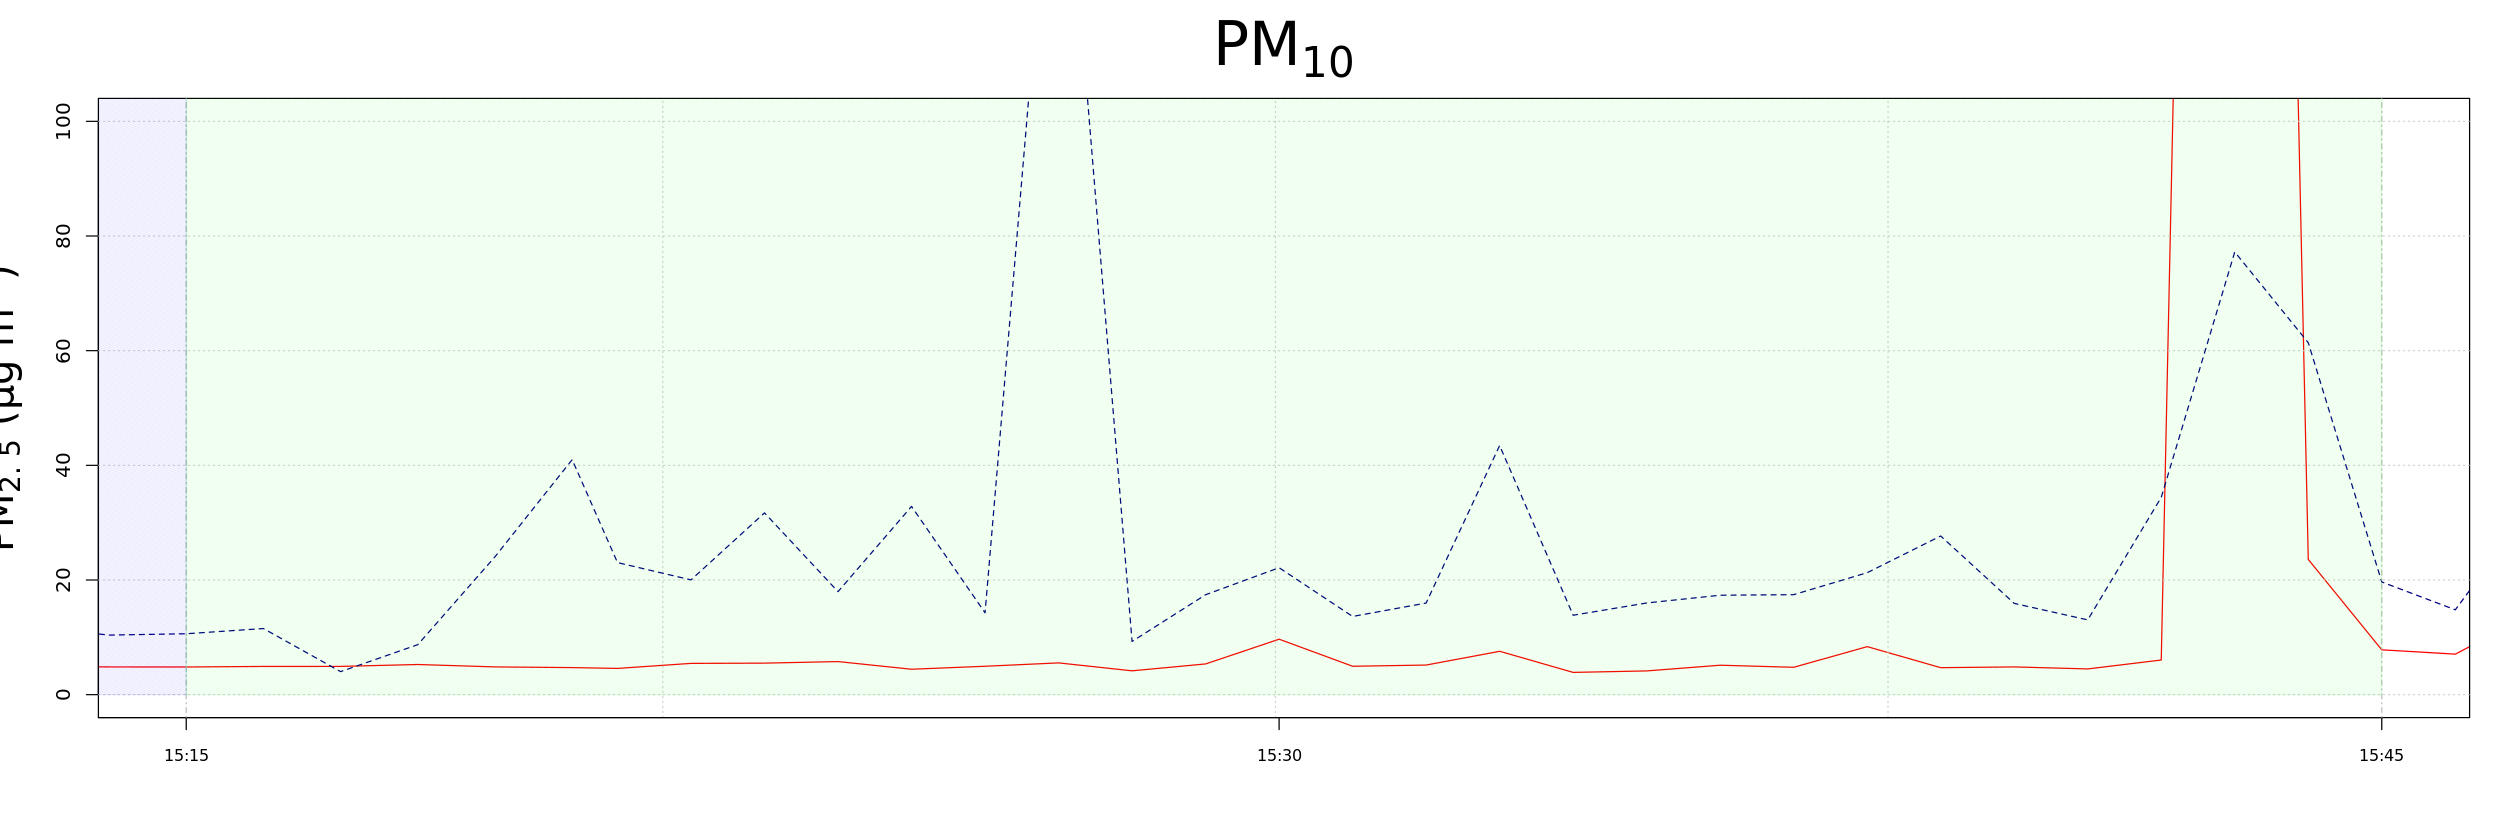

In [ ]:
#periodo 3 fa schifo

plot(datos$date, datos_g$pm2.5, type = 'l', col = 'red', xaxt = 'n',
    ylab = TeX(r'(PM_{2.5} ($\mu$g m^{-3}))'), xlab = '', cex.axis = 1,
    ylim = c(0,100), cex.lab = 2, main = TeX(r'(PM_{10})'), cex.main = 3,
    xlim = c(xticks[5], xticks[7]))
grid()
lines(datos$date, datos$`pm2.5`, col = 'navy', lty = 2)
axis(side = 1, at = xticks, labels = format(xticks, '%H:%M'), cex.axis = 0.8)
abline(v = xticks[1], lty=4, col = 'grey')
abline(v = xticks[3], lty=4, col = 'grey')
abline(v = xticks[5], lty=4, col = 'grey')
abline(v = xticks[7], lty=4, col = 'grey')

polygon(x = c(xticks[1], xticks[3], xticks[3], xticks[1]), y = c(0, 0, 400, 400), col = rgb(255,0,0, max = 255, alpha = 20), density = 100)
polygon(x = c(xticks[3], xticks[5], xticks[5], xticks[3]), y = c(0, 0, 400, 400), col = rgb(0,0,255, max = 255, alpha = 20), density = 100)
polygon(x = c(xticks[5], xticks[7], xticks[7], xticks[5]), y = c(0, 0, 400, 400), col = rgb(0,255,0, max = 255, alpha = 20), density = 100)

text(xticks[2], 380, 'Periodo 1', col = 'red', cex = 2)
text(xticks[4], 380, 'Periodo 2', col = 'blue', cex = 2)
text(xticks[6], 380, 'Periodo 3', col = 'green', cex = 2)


In [ ]:
#divisione in periodi

per_background_g <- datos_g[6:34,]
per_openwind_g <- datos_g[36:63,]
per_incenso_g <- datos_g[67:93,]
per_panni_g <- datos_g[90:94,]

# average the data for specified time period, save to new data .txt file, decimal point, tab separated
datos_background_g <-timeAverage(per_background_g, avg.time = "30 min", statistic = "mean", vector.ws=FALSE)
datos_openwind_g <-timeAverage(per_openwind_g, avg.time = "30 min", statistic = "mean", vector.ws=FALSE)
datos_incenso_g <-timeAverage(per_incenso_g, avg.time = "27 min", statistic = "mean", vector.ws=FALSE)
datos_panni_g <-timeAverage(per_panni_g, avg.time = "5 min", statistic = "mean", vector.ws=FALSE)

write.table(datos_background_g, file="media_background_g.txt",  dec=".", sep ="\t", col.names=T, row.names=F, append=F)
write.table(datos_openwind_g, file="media_openwind_g.txt",  dec=".", sep ="\t", col.names=T, row.names=F, append=F)
write.table(datos_incenso_g, file="media_incenso_g.txt",  dec=".", sep ="\t", col.names=T, row.names=F, append=F)
#write.table(datos_panni, file="media_panni.txt",  dec=".", sep ="\t", col.names=T, row.names=F, append=F)


In [ ]:
#extract just particle number from the two subsets
PN1_g <- datos_background_g[,18:31]
PN2_g <- datos_openwind_g[,18:31]
PN3_g <- datos_incenso_g[,18:31]
PN4_g <- datos_panni_g[,18:31]
PN_g = data.frame(d_g = t(D.opc_g), P1_g = t(PN1_g), P2_g = t(PN2_g), P3_g = t(PN3_g), PN4_g=t(PN4_g), type = 'N')

#convert particle number distribution into particle surface distribution, and then plot
S.opc_g <- pi*D.opc_g^2
PS1_g <- S.opc_g*PN1_g
PS2_g <- S.opc_g*PN2_g
PS3_g <- S.opc_g*PN3_g
PS4_g <- S.opc_g*PN4_g
PS_g = data.frame(d_g = t(D.opc_g), P1_g = t(PS1_g), P2_g = t(PS2_g), P3_g = t(PS3_g), type = 'S')


#convert particle number distribution into particle volume distribution, and then plot
V.opc_g <- pi/6*D.opc_g^3
PV1_g <- V.opc_g*PN1_g
PV2_g <- V.opc_g*PN2_g
PV3_g <- V.opc_g*PN3_g
PV4_g <- V.opc_g*PN4_g
PV_g = data.frame(d_g = t(D.opc_g), P1_g = t(PV1_g), P2_g = t(PV2_g), P3_g = t(PV3_g), type = 'V')


In [ ]:
#plot average particle size distribution for the two periods 
options(repr.plot.width = 18, repr.plot.height = 5)
pdf('immagini/distribuzioni_g.pdf', width = 18, height = 5)
par(mfrow = c(1,3), mar = c(4,5,2,4), oma = c(4,0,3,0), cex.main = 2)
##############################################################
plot(D.opc_g, PN1_g, xlab = expression(paste("D (", mu, "m)")), ylab = expression(paste("dN/dln(D) (cm"^"-3",")")), type ="o", col ="red", yaxt='n',
        log = 'xy', cex.lab = 1.5, main = 'Distribuzione in numero',
        ylim = c(0.05,20000))
grid()
lines(D.opc_g, PN2_g, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="blue")
lines(D.opc_g, PN3_g, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="green")
lines(D.opc_g, PN4_g, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="orchid")


y1 <- floor(log10(range(PN1_g[log10(PN1_g)!=-Inf])))
pow_y <- seq(y1[1], y1[2]+1)
ticksat_y <- as.vector(sapply(pow_y, function(p) (1:10)*10^p))
axis(2, 10^pow_y, at = 10^pow_y)
axis(2, ticksat_y, labels=NA, tcl=-0.25, lwd=0, lwd.ticks=1)


###################################################################

#plot average particle surface distribution for the two periods                 
plot(D.opc_g, PS1_g, xlab = expression(paste("D (", mu, "m)")), ylab = expression(paste("dS/dln(D) ( ", mu, "m"^"2","cm"^"-3",")")), 
        type ="o", col ="red", yaxt='n', ylim = c(100, 1000000),
        log = 'xy', cex.lab = 1.5, main = 'Distribuzione in superficie')
grid()
lines(D.opc_g, PS2_g, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="blue")
lines(D.opc_g, PS3_g, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="green")
lines(D.opc_g, PS4_g, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="orchid")

#y1 <- floor(log10(range(PS1_g[log10(PS1_g)!=-Inf])))
y1 = floor(log10(c(100,100000)))
pow_y <- seq(y1[1], y1[2]+1)
ticksat_y <- as.vector(sapply(pow_y, function(p) (1:10)*10^p))
axis(2, 10^pow_y, at = 10^pow_y)
axis(2, ticksat_y, labels=NA, tcl=-0.25, lwd=0, lwd.ticks=1)


####################################################
#plot average particle volume distribution for the two periods                 
plot(D.opc_g, PV1_g, xlab = expression(paste("D (", mu, "m)")), ylab = expression(paste("dV/dln(D) ( ", mu, "m"^"3","cm"^"-3",")")), 
        type ="o", col ="red", yaxt='n', ylim = c(10,1500000),
        log = 'xy', cex.lab = 1.5, main = 'Distribuzione in volume')
grid()
lines(D.opc_g, PV2_g, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="blue")
lines(D.opc_g, PV3_g, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="green")
lines(D.opc_g, PV4_g, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="orchid")

#y1 <- floor(log10(range(PV1_g[log10(PV1_g)!=-Inf])))
y1 <- floor(log10(c(100,100000)))
pow_y <- seq(y1[1], y1[2]+1)
ticksat_y <- as.vector(sapply(pow_y, function(p) (1:10)*10^p))
axis(2, 10^pow_y, at = 10^pow_y)
axis(2, ticksat_y, labels=NA, tcl=-0.25, lwd=0, lwd.ticks=1)


par(fig = c(0, 1, 0, 1), oma = c(0, 0, 0, 0), mar = c(0, 0, 3, 0), new = TRUE)
plot(0, 0, type = 'l', bty = 'n', xaxt = 'n', yaxt = 'n',
        cex.main = 2)
legend('bottom', lty = 1, col = c('red', 'blue', 'green', 'orchid'), legend = c('Periodo 1', 'Periodo 2', 'Periodo 3', 'Ultimi 5 minuti'),
        bty = 'n', horiz = T, cex = 1.5)
dev.off()

png 
  2

In [ ]:
diff(D.opc_g)

numeric(0)

In [ ]:
pdf('immagini/ScatterPlot_OPC_prova.pdf', width = 21, height = 7)
par(mar = c(4,5,4,4), mfrow = c(1,3))
plot(per_background_g$'pm1', per_background$'pm1', col = 'red', cex.lab = 2,
#sprintf(r'($\alpha = %d$)', alpha)
    ylab = TeX(sprintf(r'(PM_{1} Smart Citizen ($ \mu $ g m^{-3}))')),
    xlab = TeX(sprintf(r'(PM_{1} GRIMM ($ \mu $ g m^{-3}))')),
    main = TeX(sprintf(r'(Correlazione PM_{1})')), cex.main = 3)
grid()
reg = lm(per_background$'pm1' ~ per_background_g$'pm1')
intercept = round(reg$coefficients[1], digits = 2)
slope = round(reg$coefficients[2], digits = 2)
R2 = round(cor(per_background$'pm1', per_background_g$'pm1')**2, digits = 2)
abline(reg, col = 'navy', lwd = 1)
text(3, 4, paste0('y = ', slope, 'x + ', intercept), cex = 1.5)
text(3, 3.8, bquote(r^2 == .(R2)), cex = 1.5)
#dev.off()

#pdf('immagini/ScatterPlotPM2.5.pdf')
#par(mar = c(4,5,4,4))
plot(per_background_g$'pm2.5', per_background$'pm2.5', col = 'red', cex.lab = 2,
    ylab = TeX(sprintf(r'(PM_{2.5} Smart Citizen ($ \mu $ g m^{-3}))')),
    xlab = TeX(sprintf(r'(PM_{2.5} GRIMM ($ \mu $ g m^{-3}))')),
    main = TeX(sprintf(r'(Correlazione PM_{2.5})')), cex.main = 3 )
grid()
reg = lm(per_background$'pm2.5' ~ per_background_g$'pm2.5')
intercept = round(reg$coefficients[1], digits = 2)
slope = round(reg$coefficients[2], digits = 2)
R2 = round(cor(per_background_g$'pm2.5', per_background$'pm2.5')**2, digits = 2)
abline(reg, col = 'navy', lwd = 1)
text(4.5, 13, paste0('y = ', slope, 'x + ', intercept), cex = 1.5)
text(4.5, 12, bquote(r^2 == .(R2)), cex = 1.5)
#dev.off()

#pdf('immagini/ScatterPlotPM10.pdf')
#par(mar = c(4,5,4,4))
plot(per_background_g$'pm10', per_background$'pm10', col = 'red', cex.lab = 2,
    ylab = TeX(sprintf(r'(PM_{10} Smart Citizen ($ \mu $ g m^{-3}))')),
    xlab = TeX(sprintf(r'(PM_{10} GRIMM ($ \mu $ g m^{-3}))')),
    main = TeX(sprintf(r'(Correlazione PM_{10})')), cex.main = 3 )
grid()
reg = lm(per_background$'pm10' ~ per_background_g$'pm10')
intercept = round(reg$coefficients[1], digits = 2)
slope = round(reg$coefficients[2], digits = 2)
R2 = round(cor(per_background_g$'pm10', per_background$'pm10')**2, digits = 2)
abline(reg, col = 'navy', lwd = 1)
text(12,30, paste0('y = ', slope, 'x - ', abs(intercept)), cex = 1.5)
text(12, 28, bquote(r^2 == .(R2)), cex = 1.5)
dev.off()


png 
  2

In [ ]:
colnames(datos_g)

[1] "Iden"       "X..0.30.µm" "X..0.40.µm" "X..0.50.µm" "X..0.65.µm"
 [6] "X..0.80.µm" "X..1.00.µm" "X..1.60.µm" "X..2.00.µm" "X..3.00.µm"
[11] "X..4.00.µm" "X..5.00.µm" "X..7.50.µm" "X..10.0.µm" "X..15.0.µm"
[16] "X..20.0.µm" "X0.30"      "X0.40"      "X0.50"      "X0.65"     
[21] "X0.8"       "X1"         "X1.6"       "X2"         "X3"        
[26] "X4"         "X5"         "X7.5"       "X10"        "X15"       
[31] "X20"        "date"       "pm1"        "pm2.5"      "pm10"

## Altro da sistemare

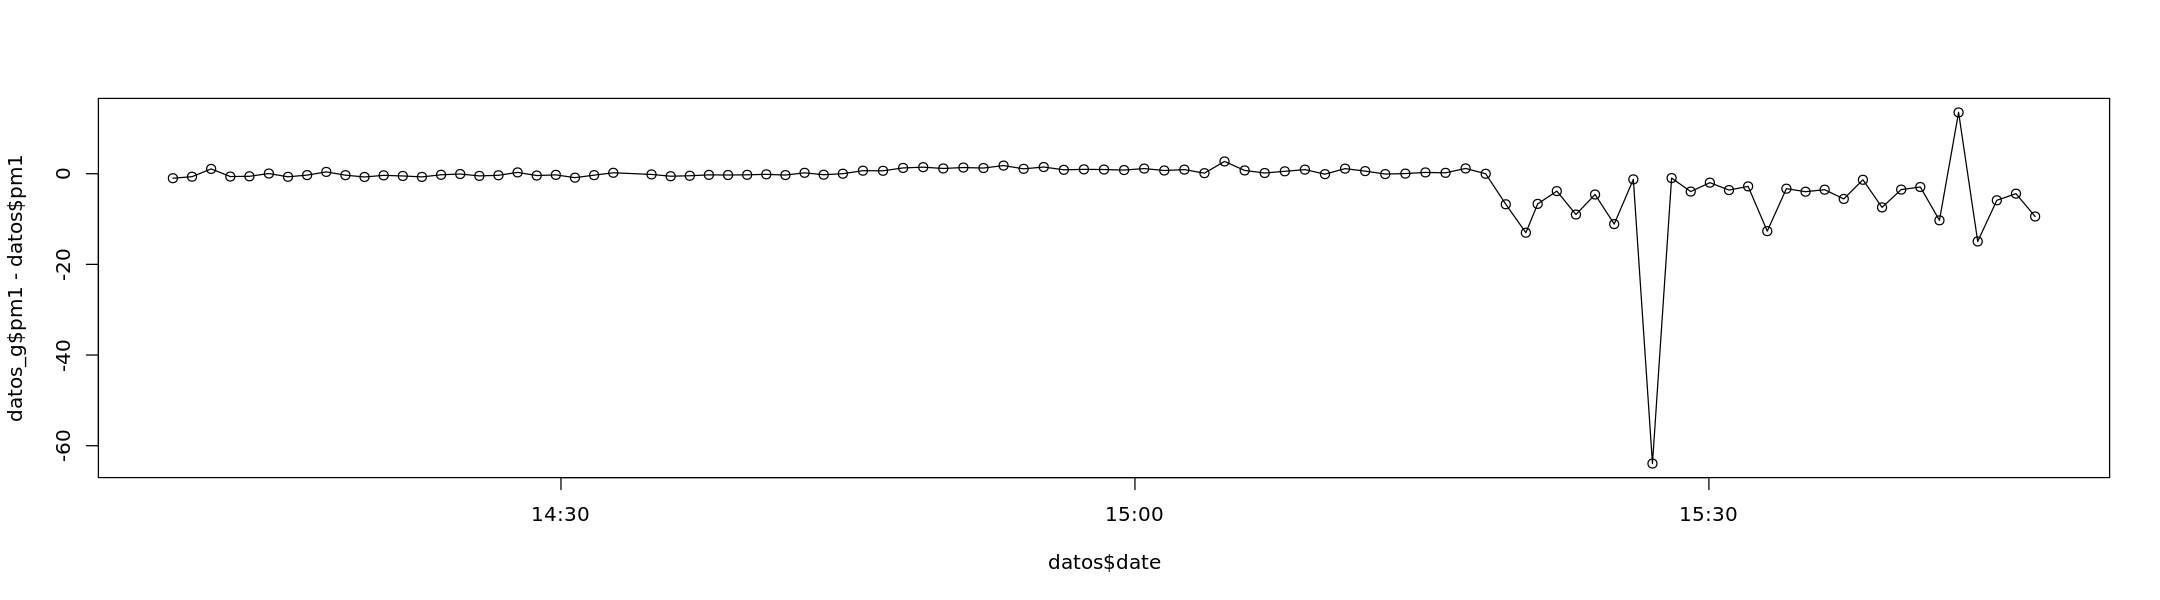

In [ ]:
mask = which(datos$date == xticks[3])
#plot(datos$date[1:mask], abs(datos_g$pm1[1:mask] - datos$pm1[1:mask]), type = 'o')

#plot(datos$date[mask:length(datos$date)], abs(datos_g$pm1[mask:length(datos$date)] - datos$'pm1'[mask:length(datos$date)]), type = 'o')

plot(datos$date, datos_g$pm1 - datos$pm1, type = 'o')

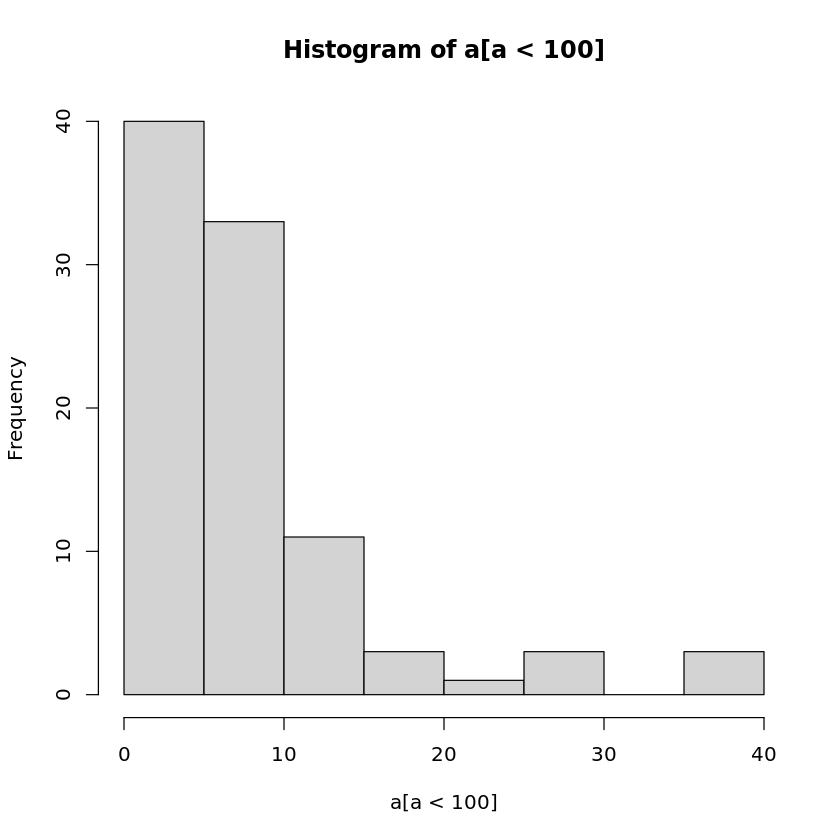

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 7)
a = abs(datos_g$pm2.5 - datos$pm2.5 )

hist(a[a<100])

Warning message in abs(datos$pm1 - datos$PM.1.0)/diff(datos$PM.1.0):
“longer object length is not a multiple of shorter object length”


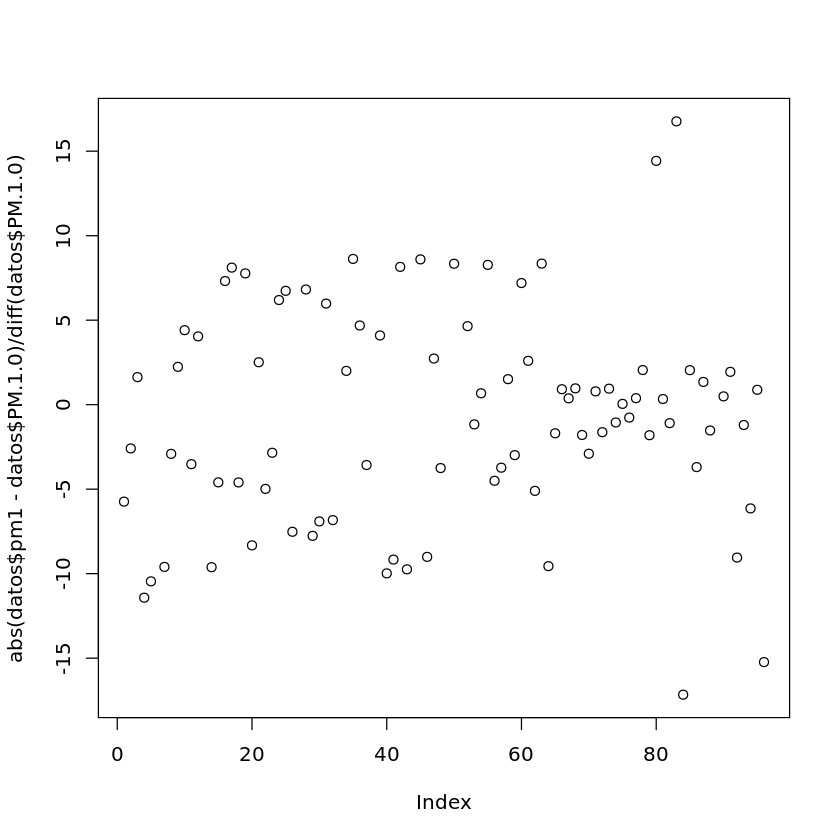

In [ ]:
plot(abs(datos$pm1-datos$`PM.1.0`)/diff(datos$`PM.1.0`))

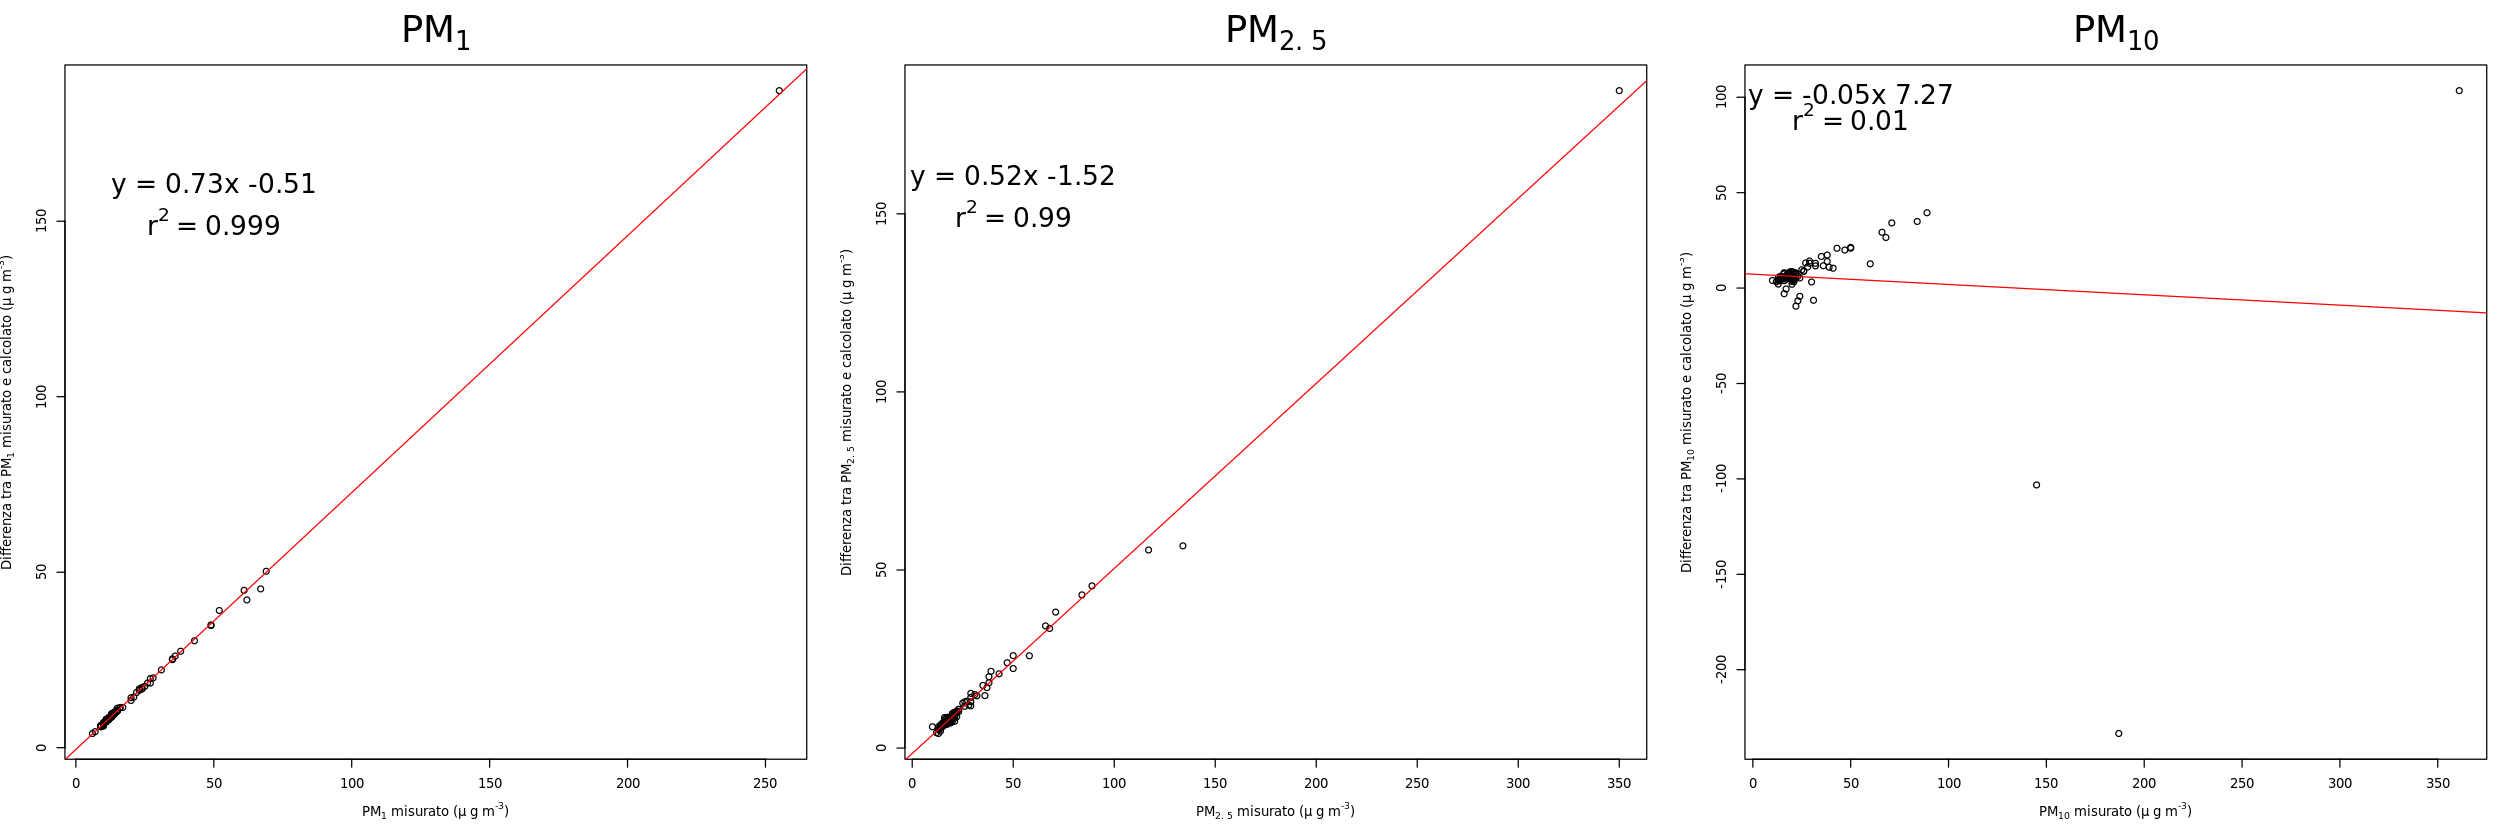

In [ ]:
#Analisi delle differenze con tutti i dati

options(repr.plot.width = 21, repr.plot.height = 7)
#pdf('immagini/Errori.pdf', height = 7, width = 21)
par(mfrow = c(1,3))
plot(datos$`PM.1.0`, -datos$pm1+datos$`PM.1.0`, 
    ylab = TeX(sprintf(r'(Differenza tra PM_{1} misurato e calcolato ($ \mu $ g m^{-3}))')),
    xlab = TeX(sprintf(r'(PM_{1} misurato ($ \mu $ g m^{-3}))')),
    main = TeX(sprintf(r'(PM_{1})')), cex.main = 2.8 )
reg = lm(-datos$pm1+datos$`PM.1.0` ~ datos$`PM.1.0`)
intercept = round(reg$coefficients[1], digits = 2)
slope = round(reg$coefficients[2], digits = 2)
R2 = round(cor(datos$`PM.1.0`, -datos$pm1+datos$`PM.1.0`)**2, digits = 3)
abline(reg, col = 'red', lwd = 1)
text(50, 160, paste0('y = ', slope, 'x ', intercept), cex = 2)
text(50, 150, bquote(r^2 == .(R2)), cex = 2)

plot(datos$`PM.2.5`, -datos$pm2.5+datos$`PM.2.5`, 
    ylab = TeX(sprintf(r'(Differenza tra PM_{2.5} misurato e calcolato ($ \mu $ g m^{-3}))')),
    xlab = TeX(sprintf(r'(PM_{2.5} misurato ($ \mu $ g m^{-3}))')),
    main = TeX(sprintf(r'(PM_{2.5})')), cex.main = 2.8 )
reg = lm(-datos$pm2.5+datos$`PM.2.5` ~ datos$`PM.2.5`)
intercept = round(reg$coefficients[1], digits = 2)
slope = round(reg$coefficients[2], digits = 2)
R2 = round(cor(datos$`PM.2.5`, -datos$pm2.5+datos$`PM.2.5`)**2, digits = 2)
abline(reg, col = 'red', lwd = 1)
text(50, 160, paste0('y = ', slope, 'x ', intercept), cex = 2)
text(50, 150, bquote(r^2 == .(R2)), cex = 2)

plot(datos$`PM.10.0`, -datos$pm10+datos$`PM.10.0`, 
    ylab = TeX(sprintf(r'(Differenza tra PM_{10} misurato e calcolato ($ \mu $ g m^{-3}))')),
    xlab = TeX(sprintf(r'(PM_{10} misurato ($ \mu $ g m^{-3}))')),
    main = TeX(sprintf(r'(PM_{10})')), cex.main = 2.8 )
reg = lm(-datos$pm10+datos$`PM.10.0` ~ datos$`PM.10.0`)
intercept = round(reg$coefficients[1], digits = 2)
slope = round(reg$coefficients[2], digits = 2)
R2 = round(cor(datos$`PM.10.0`, -datos$pm10+datos$`PM.10.0`)**2, digits = 2)
abline(reg, col = 'red', lwd = 1)
text(50, 100, paste0('y = ', slope, 'x ', intercept), cex = 2)
text(50, 90, bquote(r^2 == .(R2)), cex = 2)

#dev.off()

In [ ]:
#Analisi delle differenze escludendo 3 picchi anomali

dim(datos)
datos = datos %>% filter(pm10 < 200)
dim(datos)

options(repr.plot.width = 21, repr.plot.height = 7)
pdf('immagini/Errori.pdf', height = 7, width = 21)
par(mfrow = c(1,3), mar = c(6,6,3,4))
plot(datos$`PM.1.0`, -datos$pm1+datos$`PM.1.0`, 
    ylab = TeX(sprintf(r'(Differenza tra PM_{1} misurato e calcolato ($ \mu $ g m^{-3}))')),
    xlab = TeX(sprintf(r'(PM_{1} misurato ($ \mu $ g m^{-3}))')),
    main = TeX(sprintf(r'(PM_{1})')), cex.main = 2.8, cex.lab = 1.8 )
reg = lm(-datos$pm1+datos$`PM.1.0` ~ datos$`PM.1.0`)
intercept = round(reg$coefficients[1], digits = 2)
slope = round(reg$coefficients[2], digits = 2)
R2 = round(cor(datos$`PM.1.0`, -datos$pm1+datos$`PM.1.0`)**2, digits = 3)
abline(reg, col = 'red', lwd = 1)
text(15, 50, paste0('y = ', slope, 'x ', intercept,'0'), cex = 2)
text(15, 48, bquote(r^2 == .(R2)), cex = 2)

plot(datos$`PM.2.5`, -datos$pm2.5+datos$`PM.2.5`, 
    ylab = TeX(sprintf(r'(Differenza tra PM_{2.5} misurato e calcolato ($ \mu $ g m^{-3}))')),
    xlab = TeX(sprintf(r'(PM_{2.5} misurato ($ \mu $ g m^{-3}))')),
    main = TeX(sprintf(r'(PM_{2.5})')), cex.main = 2.8, cex.lab = 1.8)
reg = lm(-datos$pm2.5+datos$`PM.2.5` ~ datos$`PM.2.5`)
intercept = round(reg$coefficients[1], digits = 2)
slope = round(reg$coefficients[2], digits = 2)
R2 = round(cor(datos$`PM.2.5`, -datos$pm2.5+datos$`PM.2.5`)**2, digits = 2)
abline(reg, col = 'red', lwd = 1)
text(20, 45, paste0('y = ', slope, 'x ', intercept), cex = 2)
text(20, 43, bquote(r^2 == .(R2)), cex = 2)


plot(datos$`PM.10.0`, -datos$pm10+datos$`PM.10.0`, 
    ylab = TeX(sprintf(r'(Differenza tra PM_{10} misurato e calcolato ($ \mu $ g m^{-3}))')),
    xlab = TeX(sprintf(r'(PM_{10} misurato ($ \mu $ g m^{-3}))')),
    main = TeX(sprintf(r'(PM_{10})')), cex.main = 2.8, cex.lab = 1.8 )
reg = lm(-datos$pm10+datos$`PM.10.0` ~ datos$`PM.10.0`)
intercept = round(reg$coefficients[1], digits = 2)
slope = round(reg$coefficients[2], digits = 2)
R2 = round(cor(datos$`PM.10.0`, -datos$pm10+datos$`PM.10.0`)**2, digits = 2)
abline(reg, col = 'red', lwd = 1)
text(20, 39, paste0('y = ', slope, 'x ', intercept), cex = 2)
text(20, 37, bquote(r^2 == .(R2)), cex = 2)

dev.off()

[1] 96 21

[1] 93 21

png 
  2

In [ ]:
#Analisi delle differenze escludendo 3 picchi anomali solo pm10

dim(datos)
datos = datos %>% filter(pm10 < 200)
dim(datos)

options(repr.plot.width = 7, repr.plot.height = 7)
pdf('immagini/Errori_10.pdf', height = 7, width = 7)
par(mar = c(6,6,3,4))

plot(datos$`PM.10.0`, -datos$pm10+datos$`PM.10.0`, 
    ylab = TeX(sprintf(r'(Differenza tra PM_{10} misurato e calcolato ($ \mu $ g m^{-3}))')),
    xlab = TeX(sprintf(r'(PM_{10} misurato ($ \mu $ g m^{-3}))')),
    main = TeX(sprintf(r'(PM_{10})')), cex.main = 2.5, cex.lab = 1.3)
reg = lm(-datos$pm10+datos$`PM.10.0` ~ datos$`PM.10.0`)
intercept = round(reg$coefficients[1], digits = 2)
slope = round(reg$coefficients[2], digits = 2)
R2 = round(cor(datos$`PM.10.0`, -datos$pm10+datos$`PM.10.0`)**2, digits = 2)
abline(reg, col = 'red', lwd = 1)
text(25, 39, paste0('y = ', slope, 'x ', intercept), cex = 1.3)
text(25, 36, bquote(r^2 == .(R2)), cex = 1.3)

dev.off()


pdf('immagini/Errori_10_abs.pdf', height = 7, width = 7)
par(mar = c(6,6,3,4))

plot(datos$`PM.10.0`, abs(-datos$pm10+datos$`PM.10.0`), 
    ylab = TeX(sprintf(r'(Differenza tra PM_{10} misurato e calcolato ($ \mu $ g m^{-3}))')),
    xlab = TeX(sprintf(r'(PM_{10} misurato ($ \mu $ g m^{-3}))')),
    main = TeX(sprintf(r'(PM_{10})')), cex.main = 2.5, cex.lab = 1.3)
reg = lm(abs(-datos$pm10+datos$`PM.10.0`) ~ datos$`PM.10.0`)
intercept = round(reg$coefficients[1], digits = 2)
slope = round(reg$coefficients[2], digits = 2)
R2 = round(cor(datos$`PM.10.0`, abs(-datos$pm10+datos$`PM.10.0`))**2, digits = 2)
abline(reg, col = 'red', lwd = 1)
text(25, 39, paste0('y = ', slope, 'x ', intercept), cex = 1.3)
text(25, 36, bquote(r^2 == .(R2)), cex = 1.3)

dev.off()

[1] 93 21

[1] 93 21

png 
  2

png 
  2

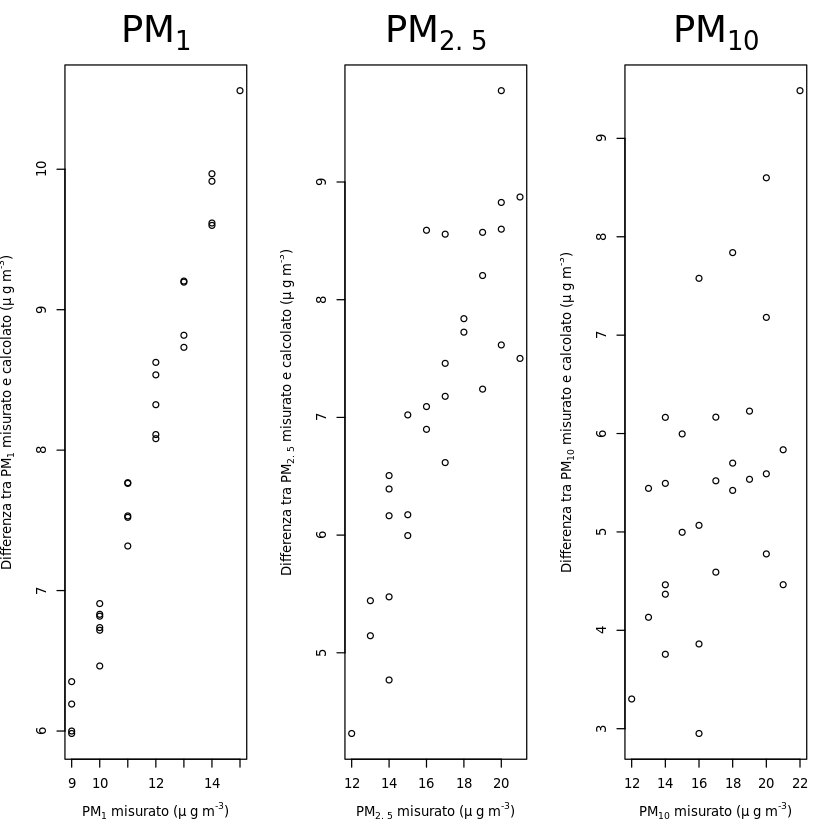

In [ ]:
#pdf('immagini/Errori_background.pdf', height = 7, width = 21)
par(mfrow = c(1,3))
plot(per_background$`PM.1.0`, -per_background$pm1+per_background$`PM.1.0`, 
    ylab = TeX(sprintf(r'(Differenza tra PM_{1} misurato e calcolato ($ \mu $ g m^{-3}))')),
    xlab = TeX(sprintf(r'(PM_{1} misurato ($ \mu $ g m^{-3}))')),
    main = TeX(sprintf(r'(PM_{1})')), cex.main = 2.8 )
reg = lm(-per_background$pm1+per_background$`PM.1.0` ~ per_background$`PM.1.0`)
intercept = round(reg$coefficients[1], digits = 2)
slope = round(reg$coefficients[2], digits = 2)
R2 = round(cor(per_background$`PM.1.0`, -per_background$pm1+per_background$`PM.1.0`)**2, digits = 3)
#abline(reg, col = 'red', lwd = 1)
text(50, 160, paste0('y = ', slope, 'x ', intercept), cex = 2)
text(50, 150, bquote(r^2 == .(R2)), cex = 2)

plot(per_background$`PM.2.5`, -per_background$pm2.5+per_background$`PM.2.5`, 
    ylab = TeX(sprintf(r'(Differenza tra PM_{2.5} misurato e calcolato ($ \mu $ g m^{-3}))')),
    xlab = TeX(sprintf(r'(PM_{2.5} misurato ($ \mu $ g m^{-3}))')),
    main = TeX(sprintf(r'(PM_{2.5})')), cex.main = 2.8 )
reg = lm(-per_background$pm2.5+per_background$`PM.2.5` ~ per_background$`PM.2.5`)
intercept = round(reg$coefficients[1], digits = 2)
slope = round(reg$coefficients[2], digits = 2)
R2 = round(cor(per_background$`PM.2.5`, -per_background$pm2.5+per_background$`PM.2.5`)**2, digits = 2)
#abline(reg, col = 'red', lwd = 1)
text(50, 160, paste0('y = ', slope, 'x ', intercept), cex = 2)
text(50, 150, bquote(r^2 == .(R2)), cex = 2)

plot(per_background$`PM.10.0`, abs(-per_background$pm10+per_background$`PM.10.0`), 
    ylab = TeX(sprintf(r'(Differenza tra PM_{10} misurato e calcolato ($ \mu $ g m^{-3}))')),
    xlab = TeX(sprintf(r'(PM_{10} misurato ($ \mu $ g m^{-3}))')),
    main = TeX(sprintf(r'(PM_{10})')), cex.main = 2.8 )
reg = lm(abs(-per_background$pm10+per_background$`PM.10.0`) ~ per_background$`PM.10.0`)
intercept = round(reg$coefficients[1], digits = 2)
slope = round(reg$coefficients[2], digits = 2)
R2 = round(cor(per_background$`PM.10.0`, abs(-per_background$pm10+per_background$`PM.10.0`))**2, digits = 2)
#abline(reg, col = 'red', lwd = 1)
text(50, 160, paste0('y = ', slope, 'x ', intercept), cex = 2)
text(50, 150, bquote(r^2 == .(R2)), cex = 2)

#dev.off()

## Prova filtraggio dati brutti OPC buono

In [ ]:
#Confronto con opc vero

file_in <- "Dati_buoni.txt"

#read data table, skip first 2 lines after the header
datos_g <- read.table(file=file_in, sep="\t", na.string="null", as.is=TRUE, header=FALSE, skip=1,
                    col.names = c("Date", "Hour", "Iden", "> 0.30 µm","> 0.40 µm", 
                    "> 0.50 µm", "> 0.65 µm", "> 0.80 µm", "> 1.00 µm", "> 1.60 µm",
                    "> 2.00 µm", "> 3.00 µm", "> 4.00 µm", "> 5.00 µm", "> 7.50 µm",
                    "> 10.0 µm", "> 15.0 µm", "> 20.0 µm", "0.30","0.40","0.50","0.65",
                    "0.8", "1", "1.6", "2", "3", "4","5", "7.5", "10", "15", "20"))

datos_g$date <- paste(datos_g$Date, datos_g$Hour, sep= ' ')
datos_g <- datos_g[,]
datos_g <- datos_g[-(1:18),-(1:2)]
datos_g <- datos_g[-(99:109),]
datos_g <- dplyr::filter(datos_g, substr(datos_g$date, 12,16) != "14:33")
datos_g <- dplyr::filter(datos_g, substr(datos_g$date, 12,16) != "14:50")

### PROVA FILTRAGGIO DATO STRANO ##
datos_g = datos_g %>% filter(X10< 500)

bin.opc_g <-matrix(c(0.30, 0.40, 0.50, 0.65, 0.80, 1.0, 1.60, 2, 3, 4, 5.0, 7.5, 10.0, 15.0, 20),1,15)
D.opc_g <-matrix(NA,1,14)

m.opc_g <-matrix(NA,nrow(datos_g),14)
colnames(m.opc_g)<-c(paste0("bin",seq(1:14),"_opc"))
opc_g.s<-datos_g[,17:31]*10^-3  #counts/cm-3, conversione fatta male da excel


In [ ]:
for(i in 1:14){
  LB<-bin.opc_g[,i]
  UB<-bin.opc_g[,i+1]
  D.opc_g[,i]<-LB*(1/4*(1+(UB/LB)^2)*(1+(UB/LB)))^(1/3)
  m.opc_g[,i]<-1.65*opc_g.s[,i]*(D.opc_g[,i]*10^-4)^3*pi/6
}
C.opc_g<-m.opc_g*10^12

In [ ]:
pm1 <- cbind(apply(C.opc_g[,1:5],1,sum,na.rm=FALSE))   # calcolo del pm1
pm2.5 <- cbind(apply(C.opc_g[,1:8],1,sum,na.rm=FALSE))   # calcolo del pm2.5
pm10 <- cbind(apply(C.opc_g[,1:12],1,sum,na.rm=FALSE))   # calcolo del pm10

datos_g <- cbind(datos_g, pm1, pm2.5, pm10) 

In [ ]:
cor(datos_g$pm1, datos$pm1[-92])
cor(datos_g$pm2.5, datos$pm2.5[-92])
cor(datos_g$pm10, datos$pm10[-92])

ERROR: Error in cor(datos_g$pm1, datos$pm1[-92]): incompatible dimensions


In [ ]:
options(repr.plot.width = 21, repr.plot.height = 7)
xticks = datos$date[c(7,22,36,50,64,79,94)]

#pdf('immagini/seriet_OPC.pdf', width = 21, height = 7)

par(mfrow = c(1,3), mar=c(5.5,5.5,4,3))
plot(datos$date[-92], datos_g$pm1, type = 'l', col = 'red', xaxt = 'n',
    ylab = TeX(r'(PM_{1} ($ \mu $g m^{-3}))'), xlab = '', cex.axis = 1,

    ylim = c(0,400), cex.lab = 2, main = TeX(r'(PM_1)'), cex.main = 3)
grid()
lines(datos$date, datos$pm1, col = 'navy', lty = 2)
axis(side = 1, at = xticks, labels = format(xticks, '%H:%M'), cex.axis = 0.8)
abline(v = xticks[1], lty=4, col = 'grey')
abline(v = xticks[3], lty=4, col = 'grey')
abline(v = xticks[5], lty=4, col = 'grey')
abline(v = xticks[7], lty=4, col = 'grey')

polygon(x = c(xticks[1], xticks[3], xticks[3], xticks[1]), y = c(0, 0, 400, 400), col = rgb(255,0,0, max = 255, alpha = 20), density = 100)
polygon(x = c(xticks[3], xticks[5], xticks[5], xticks[3]), y = c(0, 0, 400, 400), col = rgb(0,0,255, max = 255, alpha = 20), density = 100)
polygon(x = c(xticks[5], xticks[7], xticks[7], xticks[5]), y = c(0, 0, 400, 400), col = rgb(0,255,0, max = 255, alpha = 20), density = 100)

text(xticks[2], 380, 'Periodo 1', col = 'red', cex = 2)
text(xticks[4], 380, 'Periodo 2', col = 'blue', cex = 2)
text(xticks[6], 380, 'Periodo 3', col = 'green', cex = 2)

#par(fig = c(0, 1, 0, 1), oma = c(0, 0, 0, 0), mar = c(0, 0, 0, 0), new = TRUE)
#plot(0, 0, type = 'l', bty = 'n', xaxt = 'n', yaxt = 'n')
#legend('bottom', lty = c(1,2), col = c('red', 'grey'), legend = c(TeX(r'(PM_{1} misurato)'), TeX(r'(PM_{1} calcolato)')),
#        bty = 'n', horiz = T, cex = 1)
#dev.off()

#pdf('immagini/seriet_PM2.5.pdf', width = 7, height = 7)
#par(mar=c(5,5,4,3))

plot(datos$date[-92], datos_g$pm2.5, type = 'l', col = 'red', xaxt = 'n',
    ylab = TeX(r'(PM_{2.5} ($\mu$g m^{-3}))'), xlab = '', cex.axis = 1,
    ylim = c(0,400), cex.lab = 2, main = TeX(r'(PM_{2.5})'), cex.main = 3)
grid()
lines(datos$date, datos$`pm2.5`, col = 'navy', lty = 2)
axis(side = 1, at = xticks, labels = format(xticks, '%H:%M'), cex.axis = 0.8)
abline(v = xticks[1], lty=4, col = 'grey')
abline(v = xticks[3], lty=4, col = 'grey')
abline(v = xticks[5], lty=4, col = 'grey')
abline(v = xticks[7], lty=4, col = 'grey')

polygon(x = c(xticks[1], xticks[3], xticks[3], xticks[1]), y = c(0, 0, 400, 400), col = rgb(255,0,0, max = 255, alpha = 20), density = 100)
polygon(x = c(xticks[3], xticks[5], xticks[5], xticks[3]), y = c(0, 0, 400, 400), col = rgb(0,0,255, max = 255, alpha = 20), density = 100)
polygon(x = c(xticks[5], xticks[7], xticks[7], xticks[5]), y = c(0, 0, 400, 400), col = rgb(0,255,0, max = 255, alpha = 20), density = 100)

text(xticks[2], 380, 'Periodo 1', col = 'red', cex = 2)
text(xticks[4], 380, 'Periodo 2', col = 'blue', cex = 2)
text(xticks[6], 380, 'Periodo 3', col = 'green', cex = 2)


#par(fig = c(0, 1, 0, 1), oma = c(0, 0, 0, 0), mar = c(0, 0, 0, 0), new = TRUE)
#plot(0, 0, type = 'l', bty = 'n', xaxt = 'n', yaxt = 'n')
#legend('bottom', lty = c(1,2), col = c('red', 'darkgrey'), legend = c(TeX(r'(PM_{2.5} misurato)'), TeX(r'(PM_{2.5} calcolato)')),
#        bty = 'n', horiz = T, cex = 1)

#dev.off()

#pdf('immagini/seriet_PM10.pdf', width = 7, height = 7)

#par(mar=c(5,5,4,3))


plot(datos$date[-92], datos_g$pm10, type = 'l', col = 'red', xaxt = 'n',
    ylab = TeX(r'(PM_{10} ($\mu$g m^{-3}))'), xlab = '', cex.axis = 1,
    ylim = c(0,400), cex.lab = 2, main = TeX(r'(PM_{10})'), cex.main = 3)
grid()
lines(datos$date, datos$pm10, col = 'navy', lty = 2)
axis(side = 1, at = xticks, labels = format(xticks, '%H:%M'), cex.axis = 0.8)
abline(v = xticks[1], lty=4, col = 'grey')
abline(v = xticks[3], lty=4, col = 'grey')
abline(v = xticks[5], lty=4, col = 'grey')
abline(v = xticks[7], lty=4, col = 'grey')

polygon(x = c(xticks[1], xticks[3], xticks[3], xticks[1]), y = c(0, 0, 400, 400), col = rgb(255,0,0, max = 255, alpha = 20), density = 100)
polygon(x = c(xticks[3], xticks[5], xticks[5], xticks[3]), y = c(0, 0, 400, 400), col = rgb(0,0,255, max = 255, alpha = 20), density = 100)
polygon(x = c(xticks[5], xticks[7], xticks[7], xticks[5]), y = c(0, 0, 400, 400), col = rgb(0,255,0, max = 255, alpha = 20), density = 100)

text(xticks[2], 380, 'Periodo 1', col = 'red', cex = 2)
text(xticks[4], 380, 'Periodo 2', col = 'blue', cex = 2)
text(xticks[6], 380, 'Periodo 3', col = 'green', cex = 2)



par(fig = c(0, 1, 0, 1), oma = c(0, 0, 0, 0), mar = c(0, 0, 0, 0), new = TRUE)
plot(0, 0, type = 'l', bty = 'n', xaxt = 'n', yaxt = 'n')
legend('bottom', lty = c(1,2), col = c('red', 'navy'), legend = c(TeX(r'(PM GRIMM)'), TeX(r'(PM Smart Citizen)')),
        bty = 'n', horiz = T, cex = 2)

#dev.off()


ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' and 'y' lengths differ


In [ ]:
#divisione in periodi

per_background_g <- datos_g[6:34,]
per_openwind_g <- datos_g[36:63,]
per_incenso_g <- datos_g[67:93,]
per_panni_g <- datos_g[90:94,]

# average the data for specified time period, save to new data .txt file, decimal point, tab separated
datos_background_g <-timeAverage(per_background_g, avg.time = "30 min", statistic = "mean", vector.ws=FALSE)
datos_openwind_g <-timeAverage(per_openwind_g, avg.time = "30 min", statistic = "mean", vector.ws=FALSE)
datos_incenso_g <-timeAverage(per_incenso_g, avg.time = "28 min", statistic = "mean", vector.ws=FALSE)
datos_panni_g <-timeAverage(per_panni_g, avg.time = "6 min", statistic = "mean", vector.ws=FALSE)

write.table(datos_background_g, file="media_background_g.txt",  dec=".", sep ="\t", col.names=T, row.names=F, append=F)
write.table(datos_openwind_g, file="media_openwind_g.txt",  dec=".", sep ="\t", col.names=T, row.names=F, append=F)
write.table(datos_incenso_g, file="media_incenso_g.txt",  dec=".", sep ="\t", col.names=T, row.names=F, append=F)
#write.table(datos_panni, file="media_panni.txt",  dec=".", sep ="\t", col.names=T, row.names=F, append=F)


In [ ]:
#extract just particle number from the two subsets
PN1_g <- datos_background_g[,18:31]
PN2_g <- datos_openwind_g[,18:31]
PN3_g <- datos_incenso_g[,18:31]
PN4_g <- datos_panni_g[,18:31]

#convert particle number distribution into particle surface distribution, and then plot
S.opc_g <- pi*D.opc_g^2
PS1_g <- S.opc_g*PN1_g
PS2_g <- S.opc_g*PN2_g
PS3_g <- S.opc_g*PN3_g
PS4_g <- S.opc_g*PN4_g


#convert particle number distribution into particle volume distribution, and then plot
V.opc_g <- pi/6*D.opc_g^3
PV1_g <- V.opc_g*PN1_g
PV2_g <- V.opc_g*PN2_g
PV3_g <- V.opc_g*PN3_g
PV4_g <- V.opc_g*PN4_g


In [ ]:
#plot average particle size distribution for the two periods 
options(repr.plot.width = 18, repr.plot.height = 5)
pdf('immagini/distribuzioni_g.pdf', width = 18, height = 5)
par(mfrow = c(1,3), mar = c(4,5,2,4), oma = c(4,0,3,0), cex.main = 2)
##############################################################
plot(D.opc_g, PN1_g, xlab = expression(paste("D (", mu, "m)")), ylab = expression(paste("dN/dln(D) (cm"^"-3",")")), type ="o", col ="red", yaxt='n',
        log = 'xy', cex.lab = 1.5, main = 'Distribuzione in numero',
        ylim = c(0.05,20000))
grid()
lines(D.opc_g, PN2_g, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="blue")
lines(D.opc_g, PN3_g, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="green")
lines(D.opc_g, PN4_g, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="orchid")


y1 <- floor(log10(range(PN1_g[log10(PN1_g)!=-Inf])))
pow_y <- seq(y1[1], y1[2]+1)
ticksat_y <- as.vector(sapply(pow_y, function(p) (1:10)*10^p))
axis(2, 10^pow_y, at = 10^pow_y)
axis(2, ticksat_y, labels=NA, tcl=-0.25, lwd=0, lwd.ticks=1)


###################################################################

#plot average particle surface distribution for the two periods                 
plot(D.opc_g, PS1_g, xlab = expression(paste("D (", mu, "m)")), ylab = expression(paste("dS/dln(D) ( ", mu, "m"^"2","cm"^"-3",")")), 
        type ="o", col ="red", yaxt='n', ylim = c(100, 20000),
        log = 'xy', cex.lab = 1.5, main = 'Distribuzione in superficie')
grid()
lines(D.opc_g, PS2_g, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="blue")
lines(D.opc_g, PS3_g, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="green")
lines(D.opc_g, PS4_g, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="orchid")

#y1 <- floor(log10(range(PS1_g[log10(PS1_g)!=-Inf])))
y1 = floor(log10(c(100,100000)))
pow_y <- seq(y1[1], y1[2]+1)
ticksat_y <- as.vector(sapply(pow_y, function(p) (1:10)*10^p))
axis(2, 10^pow_y, at = 10^pow_y)
axis(2, ticksat_y, labels=NA, tcl=-0.25, lwd=0, lwd.ticks=1)


####################################################
#plot average particle volume distribution for the two periods                 
plot(D.opc_g, PV1_g, xlab = expression(paste("D (", mu, "m)")), ylab = expression(paste("dV/dln(D) ( ", mu, "m"^"3","cm"^"-3",")")), 
        type ="o", col ="red", yaxt='n', ylim = c(10,20000),
        log = 'xy', cex.lab = 1.5, main = 'Distribuzione in volume')
grid()
lines(D.opc_g, PV2_g, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="blue")
lines(D.opc_g, PV3_g, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="green")
lines(D.opc_g, PV4_g, type="o", yaxt="n",xaxt="n", ann =FALSE, col ="orchid")

#y1 <- floor(log10(range(PV1_g[log10(PV1_g)!=-Inf])))
y1 <- floor(log10(c(100,100000)))
pow_y <- seq(y1[1], y1[2]+1)
ticksat_y <- as.vector(sapply(pow_y, function(p) (1:10)*10^p))
axis(2, 10^pow_y, at = 10^pow_y)
axis(2, ticksat_y, labels=NA, tcl=-0.25, lwd=0, lwd.ticks=1)


par(fig = c(0, 1, 0, 1), oma = c(0, 0, 0, 0), mar = c(0, 0, 3, 0), new = TRUE)
plot(0, 0, type = 'l', bty = 'n', xaxt = 'n', yaxt = 'n',
        cex.main = 2)
legend('bottom', lty = 1, col = c('red', 'blue', 'green', 'orchid'), legend = c('Periodo 1', 'Periodo 2', 'Periodo 3', 'Ultimi 5 minuti'),
        bty = 'n', horiz = T, cex = 1.5)
dev.off()

png 
  2

In [ ]:
#momenti
diams = c(0.30, 0.40, 0.50, 0.65, 0.80, 1.0, 1.60, 2, 3, 4, 5.0, 7.5, 10.0, 15.0, 20)
dD.opc = diff(diams)/2
dPN1 = 1/sqrt(PN1_g)
dPN2 = 1/sqrt(PN2_g)
dPN3 = 1/sqrt(PN3_g)
dPN4 = 1/sqrt(PN4_g)

#dPN1 = 5/100*PN1_g
#dPN2 = 5/100*PN2_g
#dPN3 = 5/100*PN3_g
#dPN4 = 5/100*PN4_g

N1_g = sum(PN1_g)
dN1 = sum(dPN1)
N2_g = sum(PN2_g)
dN2 = sum(dPN2)
N3_g = sum(PN3_g)
dN3 = sum(dPN3)
N4_g = sum(PN4_g)
dN4 = sum(dPN4)

D1_g = sum(D.opc_g*PN1_g)/N1_g
dD1 = sum(PN1_g*dD.opc)/N1_g + sum(D.opc_g*dPN1)/N1_g + D1_g/N1_g**2*dN1
D2_g = sum(D.opc_g*PN2_g)/N2_g
dD2 = sum(PN2_g*dD.opc)/N2_g + sum(D.opc_g*dPN2)/N2_g + D2_g/N2_g**2*dN2
D3_g = sum(D.opc_g*PN3_g)/N3_g
dD3 = sum(PN3_g*dD.opc)/N3_g + sum(D.opc_g*dPN3)/N3_g + D3_g/N3_g**2*dN3
D4_g = sum(D.opc_g*PN4_g)/N4_g
dD4 = sum(PN4_g*dD.opc)/N4_g + sum(D.opc_g*dPN4)/N4_g + D4_g/N4_g**2*dN4


A1_g = sum(D.opc_g**2*PN1_g)/N1_g*pi
dA1 = (sum(2*D.opc_g*PN1_g*dD.opc)/N1_g + sum(D.opc_g**2*dPN1)/N1_g + A1_g/N1_g**2*dN1)*pi
A2_g = sum(D.opc_g**2*PN2_g)/N2_g*pi
dA2 = (sum(2*D.opc_g*PN2_g*dD.opc)/N2_g + sum(D.opc_g**2*dPN2)/N2_g + A2_g/N2_g**2*dN2)*pi
A3_g = sum(D.opc_g**2*PN3_g)/N3_g*pi
dA3 = (sum(2*D.opc_g*PN3_g*dD.opc)/N3_g + sum(D.opc_g**2*dPN3)/N3_g + A3_g/N3_g**2*dN3)*pi
A4_g = sum(D.opc_g**2*PN4_g)/N4_g*pi
dA4 = (sum(2*D.opc_g*PN4_g*dD.opc)/N4_g + sum(D.opc_g**2*dPN4)/N4_g + A4_g/N4_g**2*dN4)*pi


V1_g = sum(D.opc_g**3*PN1_g)/N1_g*pi/6
dV1 = (sum(3*D.opc_g**2*PN1_g*dD.opc)/N1_g + sum(D.opc_g**3*dPN1)/N1_g + V1_g/N1_g**2*dN1)*pi/6
V2_g = sum(D.opc_g**3*PN2_g)/N2_g*pi/6
dV2 = (sum(3*D.opc_g**2*PN2_g*dD.opc)/N2_g + sum(D.opc_g**3*dPN2)/N2_g + V2_g/N2_g**2*dN2)*pi/6
V3_g = sum(D.opc_g**3*PN3_g)/N3_g*pi/6
dV3 = (sum(3*D.opc_g**2*PN3_g*dD.opc)/N3_g + sum(D.opc_g**3*dPN3)/N3_g + V3_g/N3_g**2*dN3)*pi/6
V4_g = sum(D.opc_g**3*PN4_g)/N4_g*pi/6
dV4 = (sum(3*D.opc_g**2*PN4_g*dD.opc)/N4_g + sum(D.opc_g**3*dPN4)/N4_g + V4_g/N4_g**2*dN4)*pi/6



In [ ]:
options(repr.plot.width = 14, repr.plot.height = 10)
pdf('immagini/momenti_g.pdf', width = 14, height = 10)
a = c(N1_g,N2_g,N3_g,N4_g)
da = c(dN1, dN2, dN3, dN4)
par(mfrow=c(2,2), cex.axis = 1.3, cex.lab = 2.2, mar = c(3,6,3,4), cex.main = 2)
barplot(c(N1_g,N2_g,N3_g,N4_g), names.arg = c('Periodo 1', 'Periodo 2', 'Periodo 3', 'Ultimi 5 min'), col = c('red', 'blue', 'green', "orchid"), density = 30,
        ylab = expression(paste('# particelle / cm'^'3')), ylim = c(0,30000))
arrows(x0=c(0.7, 1.9, 3.1, 4.3, 5.5), y0=a+da, x1=c(0.7, 1.9, 3.1, 4.3, 5.5), y1=a-da, code=3, angle=90, length=0.1, col=c('red', 'blue', 'green', 'orchid'), lwd=2)


a = c(D1_g,D2_g,D3_g,D4_g)
da = c(dD1, dD2, dD3, dD4)
barplot(c(D1_g,D2_g,D3_g,D4_g), names.arg = c('Periodo 1', 'Periodo 2', 'Periodo 3', 'Ultimi 5 min'), col = c('red', 'blue', 'green', 'orchid'), density = 30, ylim = c(0,0.7),
        ylab = expression(paste('Diametro medio (', mu, 'm)')))
arrows(x0=c(0.7, 1.9, 3.1, 4.3, 5.5), y0=a+da, x1=c(0.7, 1.9, 3.1, 4.3, 5.5), y1=a-da, code=3, angle=90, length=0.1, col=c('red', 'blue', 'green', 'orchid'), lwd=2)

a = c(A1_g,A2_g,A3_g,A4_g)
da = c(dA1, dA2, dA3, dA4)
barplot(c(A1_g,A2_g,A3_g,A4_g), names.arg = c('Periodo 1', 'Periodo 2', 'Periodo 3', 'Ultimi 5 min'), col = c('red', 'blue', 'green', 'orchid'), density = 30, ylim = c(0,5),
        ylab = expression(paste('Superficie media (', mu, 'm'^'2',')')))
arrows(x0=c(0.7, 1.9, 3.1, 4.3, 5.5), y0=a+da, x1=c(0.7, 1.9, 3.1, 4.3, 5.5), y1=a-da, code=3, angle=90, length=0.1, col=c('red', 'blue', 'green', 'orchid'), lwd=2)


a = c(V1_g,V2_g,V3_g,V4_g)
da = c(dV1, dV2, dV3, dV4)
barplot(c(V1_g,V2_g,V3_g,V4_g), names.arg = c('Periodo 1', 'Periodo 2', 'Periodo 3', 'Ultimi 5 min'), col = c('red', 'blue', 'green', 'orchid'), density = 30, ylim = c(0,7),
        ylab = expression(paste('Volume medio (', mu, 'm'^'3',')')))
arrows(x0=c(0.7, 1.9, 3.1, 4.3, 5.5), y0=a+da, x1=c(0.7, 1.9, 3.1, 4.3, 5.5), y1=a-da, code=3, angle=90, length=0.1, col=c('red', 'blue', 'green', 'orchid'), lwd=2)

dev.off()

Warning message in arrows(x0 = c(0.7, 1.9, 3.1, 4.3, 5.5), y0 = a + da, x1 = c(0.7, :
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(x0 = c(0.7, 1.9, 3.1, 4.3, 5.5), y0 = a + da, x1 = c(0.7, :
“zero-length arrow is of indeterminate angle and so skipped”


png 
  2

In [ ]:
data_grimm <- datos_g[,33:35]
data_sc <- datos[,19:21]
corr<-cor(data_grimm, data_sc, method="spearman")
write.table(corr, file="spearman_correlations_PM_g.txt",  dec=".", sep ="\t", col.names=T, row.names=T, append=F)

ERROR: Error in cor(data_grimm, data_sc, method = "spearman"): incompatible dimensions


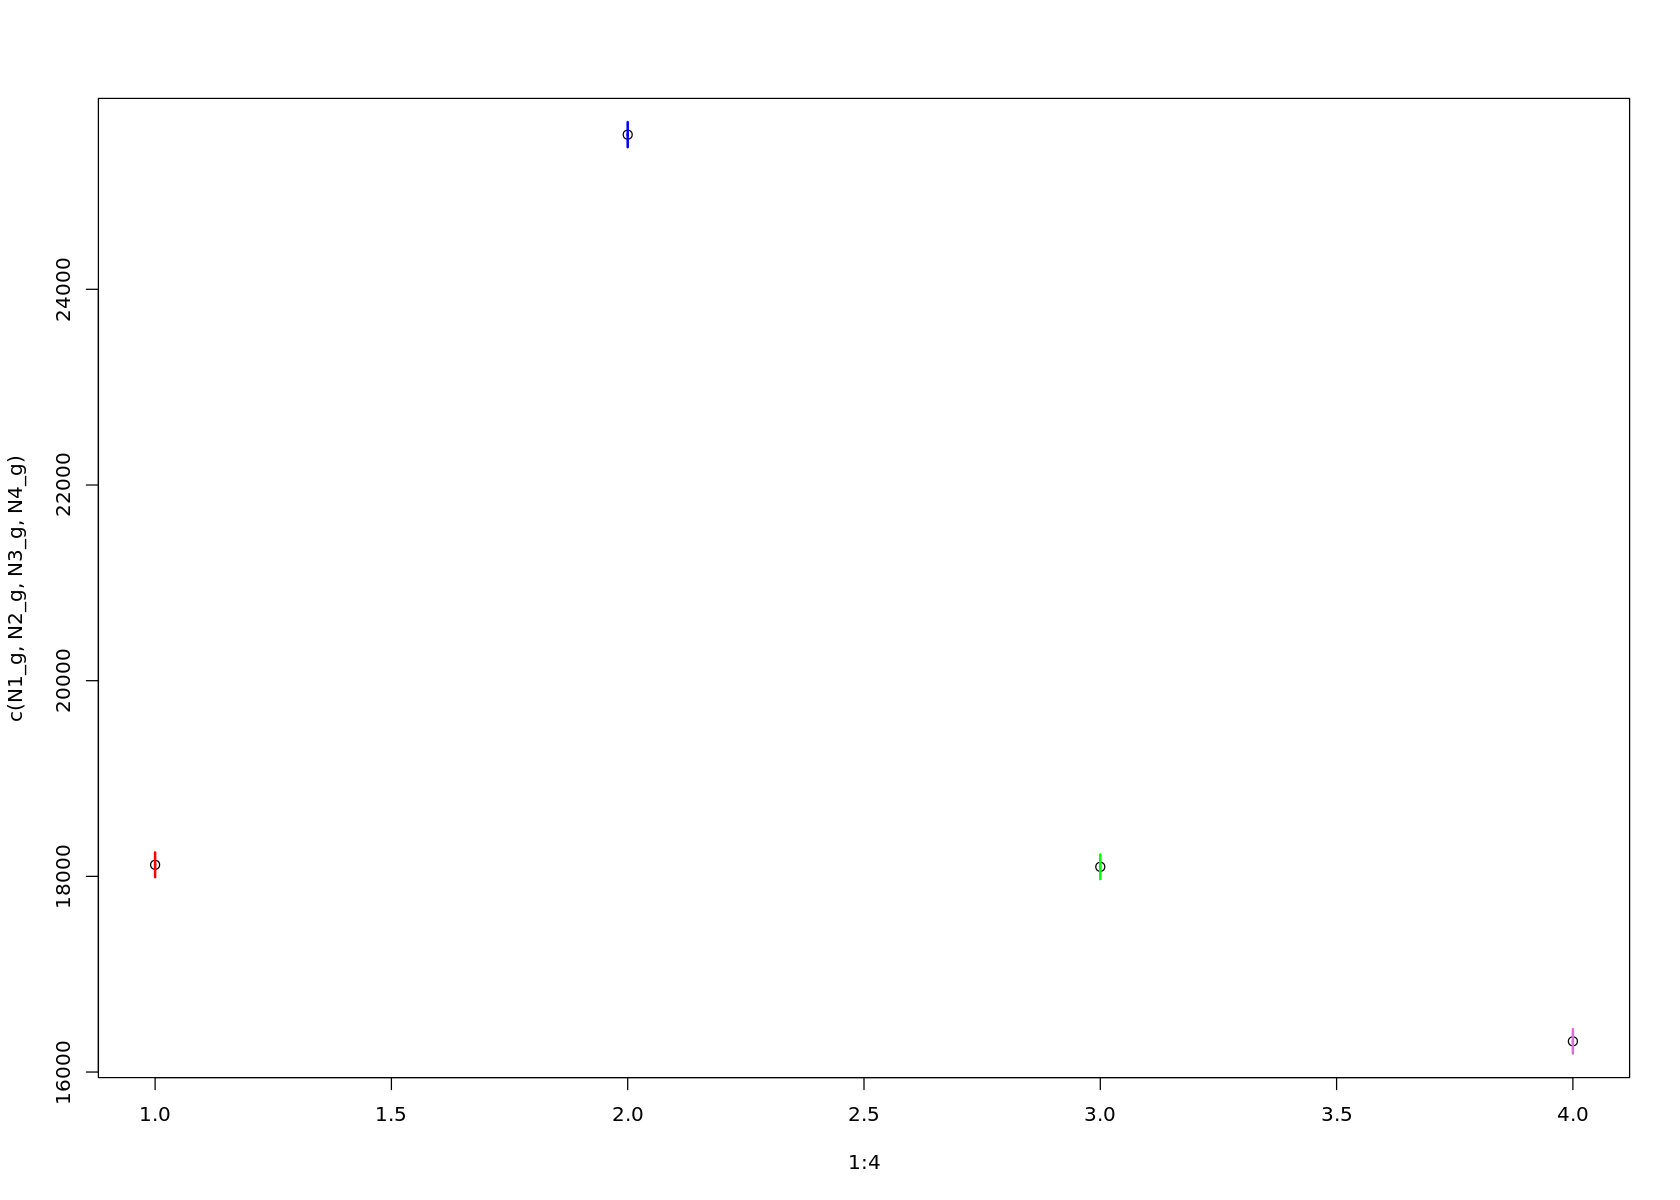

In [ ]:
plot(1:4, c(N1_g, N2_g, N3_g, N4_g))
a = c(N1_g,N2_g,N3_g,N4_g)
da = c(dN1, dN2, dN3, dN4)
arrows(x0=1:4, y0=a+da, x1=1:4, y1=a-da, code=3, angle=180, length=0.1, col=c('red', 'blue', 'green', 'orchid'), lwd=2)


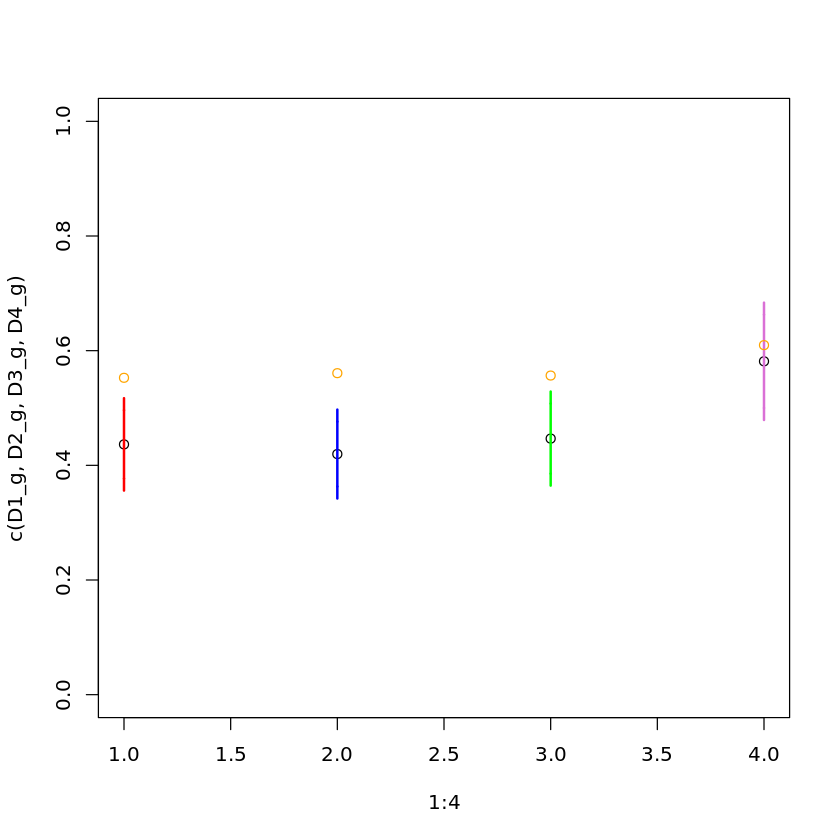

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 7)
plot(1:4, c(D1_g, D2_g, D3_g, D4_g), ylim = c(0,1))
a = c(D1_g,D2_g,D3_g,D4_g)
da = c(dD1, dD2, dD3, dD4)
arrows(x0=1:4, y0=a+da, x1=1:4, y1=a-da, code=3, angle=180, length=0.1, col=c('red', 'blue', 'green', 'orchid'), lwd=2)
points(1:4, c(D1, D2, D3, D4), col = 'orange')

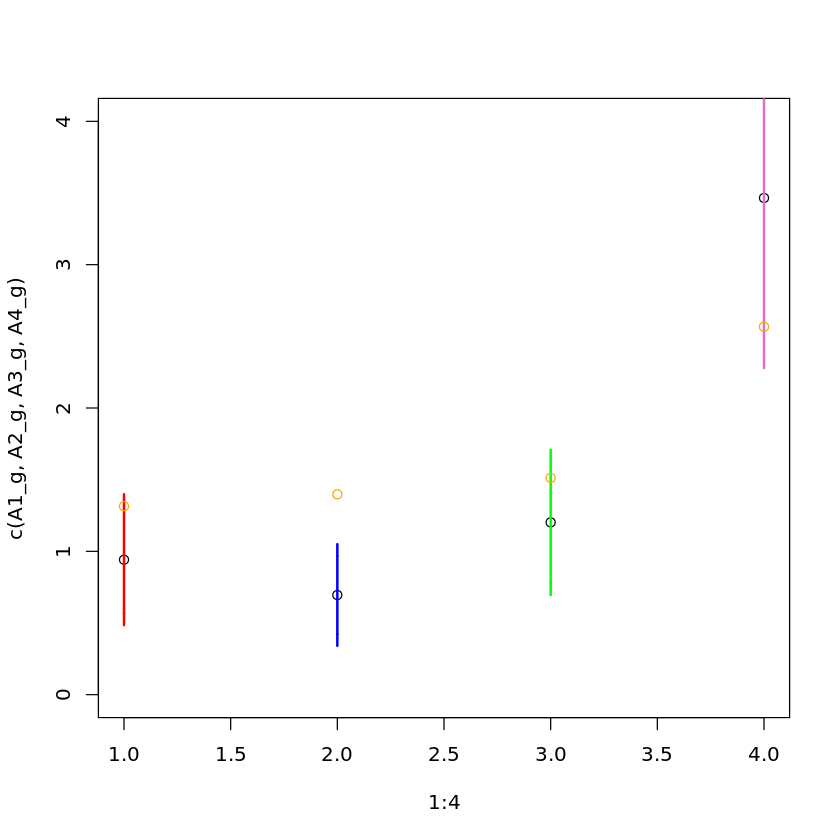

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 7)
plot(1:4, c(A1_g, A2_g, A3_g, A4_g), ylim = c(0,4))
a = c(A1_g,A2_g,A3_g,A4_g)
da = c(dA1, dA2, dA3, dA4)
arrows(x0=1:4, y0=a+da, x1=1:4, y1=a-da, code=3, angle=180, length=0.1, col=c('red', 'blue', 'green', 'orchid'), lwd=2)
points(1:4, c(A1, A2, A3, A4), col = 'orange')

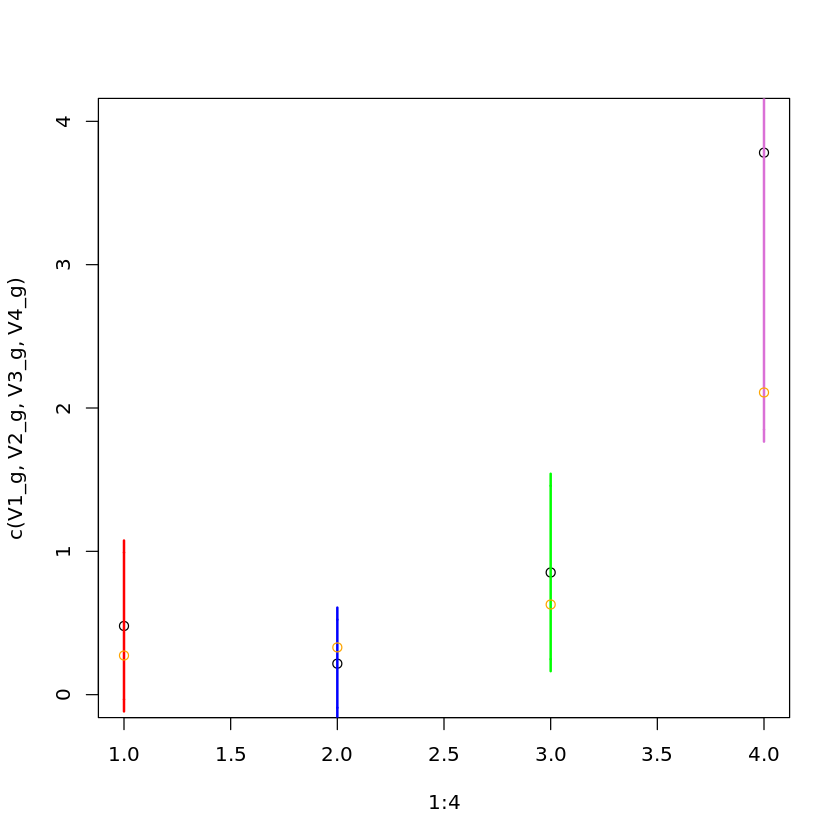

In [ ]:
options(repr.plot.width = 7, repr.plot.height = 7)
plot(1:4, c(V1_g, V2_g, V3_g, V4_g), ylim = c(0,4))
a = c(V1_g,V2_g,V3_g,V4_g)
da = c(dV1, dV2, dV3, dV4)
arrows(x0=1:4, y0=a+da, x1=1:4, y1=a-da, code=3, angle=180, length=0.1, col=c('red', 'blue', 'green', 'orchid'), lwd=2)
points(1:4, c(V1, V2, V3, V4), col = 'orange')

In [ ]:
options(repr.plot.width = 21, repr.plot.height = 7)
pdf("immagini/confronto.pdf", width = 21, height = 7)
par(mfrow = c(1,3), cex.lab = 2, oma = c(5,0,0,0), mar = c(4,6,4,4), cex.axis = 1.5)
plotter = function(a, da, a_c, ylim, lab) {
    plot(1:4, a, ylim = ylim, cex = 3, xaxt = 'n', lwd = 2, pch = 18, xlab = '', ylab = lab)
    arrows(x0=1:4, y0=a+da, x1=1:4, y1=a-da, code=3, angle=180, length=0.1, col=c('red', 'blue', 'green', 'orchid'), lwd=2)
    points(1:4, a_c, col = 'black', pch = 17, cex = 3)
}

plotter(c(D1_g, D2_g, D3_g, D4_g), c(dD1, dD2, dD3, dD4), c(D1, D2, D3, D4), c(0,1), expression(paste('Diametro medio (', mu, 'm)')))
plotter(c(A1_g, A2_g, A3_g, A4_g), c(dA1, dA2, dA3, dA4), c(A1, A2, A3, A4), c(0,5), expression(paste('Superficie media (', mu, 'm'^'2',')')))
plotter(c(V1_g, V2_g, V3_g, V4_g), c(dV1, dV2, dV3, dV4), c(V1, V2, V3, V4), c(0,7), expression(paste('Volume medio (', mu, 'm'^'3',')')))

par(fig = c(0,1,0,1), new = T, oma = c(0,0,0,0))
plot(0,0, ann=F, xaxt = 'n', yaxt = 'n', bty = 'n', type = 'l')
legend('bottom', horiz = T, legend = c('Smart Citizen Kit', 'GRIMM', 'Periodo 1', 'Periodo 2', 'Periodo 3', 'Ultimi 5 min'), pch = c(17,18, 16, 16, 16, 16),
        lty = c(0,0,1,1,1,1), col = c('black', 'black', 'red', 'blue', 'green', 'orchid'),
    bty = 'n', cex = 2, text.width=c(0.20,0.15,0.15, 0.15, 0.15), x.intersp = 0.1)

dev.off()

Warning message in w0 * rep.int(0:(ncol - 1), rep.int(n.legpercol, ncol)):
“longer object length is not a multiple of shorter object length”
Warning message in left + xchar + xextra + (w0 * rep.int(0:(ncol - 1), rep.int(n.legpercol, :
“longer object length is not a multiple of shorter object length”


png 
  2

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6a0fe6b5-2ee5-41f2-b50d-48500f9bbf62' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>